<a href="https://colab.research.google.com/github/Vs-Sarath17/PixelCollections/blob/main/Master_copy_Crop_yield_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**:
>To achieve sustainable agriculture, it is vital to accurately predict crop yields and efficiently manage resources. This can help maximize agricultural output while reducing negative environmental effects. Predicting yields and managing resources effectively is challenging due to the complex interactions/relations of various factors such as soil quality, weather(☀️🌦️🌧️⛈️🌨️), and farming practices. To improve yield estimates and optimize resource allocation, it is essential to develop a reliable predictive model that makes use of these variables.

**Background:**
>Farming is key to the economy in India, providing food🍽️ and financial stability. Yet, traditional farming methods often rely on past experiences, which can lead to inefficient use of resources and reduced crop yields. By utilizing machine learning and data-driven approaches, it's possible to tap into historical data on crops, soil conditions, weather patterns(☀️🌦️🌧️⛈️🌨️), and farming practices. This data can be used to build predictive models that guide decisions in farming.

**Relevance:**
>Precision crop yield predictions and wise resource useages in India are important for sustainable and better farming. Farmers can limit waste, cut down on the harm they do to the environment, and make the most of their resources (fertilizer💊, water💧, labor). Also, having estimates of how much will be produced can help in planning for crops, keeping track of the supply chain, and creating policies. Giving farmers better management tools for their resources can help them cut costs and make more money💰, which can make their financial situation better overall.

**Objectives:**
>The primary objectives of this project are:

1. **Crop Yield Prediction**:
>Develop a machine learning model that can accurately predict crop yields based on various input features, including soil nutrient levels, climatic conditions (rainfall🌧️, temperature🌡️), crop type.

2. **Resource Optimization**:
>Usage of the predictive model to optimize resource usage, while considering environmental constraints and sustainability of the crops.


By addressing these objectives, our project aims to contribute to the betterment of agriculture🌾 and environmental for farming communities.




### We install kaggle to import dataset 📁📂

In [ ]:
!pip install q kaggle

### **Now we import the necessary libraries**

---


1.   pandas
2.   numpy
3.   seaborn
4.   matplotlib





In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from google.colab import autoviz
import seaborn as sns
import matplotlib.pyplot as plt

### Now we upload the kaggle api

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vssarath","key":"ed82b32484af508b8226bdd55bd472c1"}'}

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

### Now we import the dataset from **kaggle** 🌐

In [ ]:
!kaggle datasets download sriharikatare/indian-crop-production

Dataset URL: https://www.kaggle.com/datasets/sriharikatare/indian-crop-production
License(s): unknown
  0% 0.00/2.04M [00:00<?, ?B/s]
100% 2.04M/2.04M [00:00<00:00, 129MB/s]


### Now we unzip it so that we can use it

In [ ]:
!unzip indian-crop-production.zip

Archive:  indian-crop-production.zip
  inflating: Crop_production.csv     


In [ ]:
df=pd.read_csv('/content/Crop_production.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          99849 non-null  int64  
 1   State_Name          99849 non-null  object 
 2   Crop_Type           99849 non-null  object 
 3   Crop                99849 non-null  object 
 4   N                   99849 non-null  int64  
 5   P                   99849 non-null  int64  
 6   K                   99849 non-null  int64  
 7   pH                  99849 non-null  float64
 8   rainfall            99849 non-null  float64
 9   temperature         99849 non-null  float64
 10  Area_in_hectares    99849 non-null  float64
 11  Production_in_tons  99849 non-null  float64
 12  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.9+ MB


## **Data Dictonary** 📔
1.  State_Name------------------------------>Name of the state where the crop is grown          
2. Crop_Type--------------------------------->Name of the type of the crop grown (rice, wheat,lentils e.t.c)             
3. Crop------------------------------------------->Name of the crop grown                  
4. N------------------------------------------------>Amount of Nitrogen                     
5.  P------------------------------------------------>Amount of Phosphorus                     
6. K------------------------------------------------>Amount of Potassium                    
7.  pH---------------------------------------------->Acidic or Basic level of the land                    
8.  rainfall---------------------------------------->Volume of rainfall            
9.  temperature-------------------------------->Temperature in Celsius           
10. Area_in_hectares------------------------>Area of crop land in hectares     
11. Production_in_tons--------------------->Production of the yeild in tons
12. Yield_ton_per_hec----------------------->Area_in_hectares/Production_in_tons





#**Hypotheses** 🔭
### Based on the dataset, let’s create some hypotheses:
Hypothesis 1:

    Nutrient Levels (N, P, K) affect crop yield.
    Higher nutrient levels lead to increased yield.
    Specific nutrient imbalances may hinder growth.
Hypothesis 2:

    pH Levels influence crop productivity.
    Optimal pH (neither too acidic nor too basic) promotes better yields.
Hypothesis 3:

    Rainfall plays a significant role.
    Adequate rainfall positively correlates with yield.
    Drought conditions may reduce production.
Hypothesis 4:

    Temperature impacts crop growth.
    Moderate temperatures are ideal for most crops.
    Extreme heat or cold can be detrimental.
Hypothesis 5:

    Area of Land affects yield.
    Larger areas may lead to higher overall production.

Hypothesis 6:

    Different crops have varying requirements.
    Some crops thrive in specific climates or soil conditions.

In [ ]:
df.describe()

,Unnamed: 0,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
count,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,9.984900e+04,99849.000000
mean,49924.000000,69.816823,41.593656,42.037827,5.643624,701.151085,26.684154,16476.585668,3.776291e+04,3.931149
std,28824.067851,39.571469,15.056508,28.430263,0.505283,604.701552,4.851214,43604.268231,1.222447e+05,33.872242
min,0.000000,10.000000,10.000000,10.000000,3.820000,3.274569,1.180000,0.580000,0.000000e+00,0.000000
25%,24962.000000,50.000000,40.000000,20.000000,5.360000,157.310000,23.106000,130.000000,1.620000e+02,0.586207
50%,49924.000000,75.000000,40.000000,30.000000,5.540000,579.750000,27.333333,1010.000000,1.506000e+03,1.329268
75%,74886.000000,80.000000,60.000000,50.000000,5.960000,1110.780000,29.266667,8099.000000,1.439500e+04,2.997288
max,99848.000000,180.000000,125.000000,200.000000,7.000000,3322.060000,35.346667,726300.000000,3.530571e+06,9801.000000


In [ ]:
df.head()

,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615


### Now we are going to check for any missing values in the dataset 🔭

In [ ]:
#Checking missing data values
missing_vals = df.isnull().sum()
print(missing_vals)


Unnamed: 0            0
State_Name            0
Crop_Type             0
Crop                  0
N                     0
P                     0
K                     0
pH                    0
rainfall              0
temperature           0
Area_in_hectares      0
Production_in_tons    0
Yield_ton_per_hec     0
dtype: int64


In [ ]:
missing_percentage = (missing_vals/len(df) * 100)
print(missing_percentage)

Unnamed: 0            0.0
State_Name            0.0
Crop_Type             0.0
Crop                  0.0
N                     0.0
P                     0.0
K                     0.0
pH                    0.0
rainfall              0.0
temperature           0.0
Area_in_hectares      0.0
Production_in_tons    0.0
Yield_ton_per_hec     0.0
dtype: float64


#### We see that the dataset doesn't have any missing data/values
So we then proceed to eliminate the duplicate rows

In [ ]:
dup_rows = df.duplicated()

print("Duplicate rows: ", dup_rows)

Duplicate rows:  0        False
1        False
2        False
3        False
4        False
         ...  
99844    False
99845    False
99846    False
99847    False
99848    False
Length: 99849, dtype: bool


### Let's find  **Z**-score for Outliers


In [ ]:
#df=pd.read_csv('/content/Crop_production.csv')
df.columns

Index(['Unnamed: 0', 'State_Name', 'Crop_Type', 'Crop', 'N', 'P', 'K', 'pH',
       'rainfall', 'temperature', 'Area_in_hectares', 'Production_in_tons',
       'Yield_ton_per_hec'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          99849 non-null  int64  
 1   State_Name          99849 non-null  object 
 2   Crop_Type           99849 non-null  object 
 3   Crop                99849 non-null  object 
 4   N                   99849 non-null  int64  
 5   P                   99849 non-null  int64  
 6   K                   99849 non-null  int64  
 7   pH                  99849 non-null  float64
 8   rainfall            99849 non-null  float64
 9   temperature         99849 non-null  float64
 10  Area_in_hectares    99849 non-null  float64
 11  Production_in_tons  99849 non-null  float64
 12  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.9+ MB


In [ ]:
tempdf=df.copy(deep=True)
tempdf.drop(tempdf.columns[[0,1,2,3,10,11]],axis=1,inplace=True)


In [ ]:
tempdf.head()

,N,P,K,pH,rainfall,temperature,Yield_ton_per_hec
0,120,40,20,5.46,654.34,29.266667,1.287671
1,20,60,20,6.18,654.34,29.266667,0.303030
2,80,40,40,5.42,654.34,29.266667,1.009901
3,80,40,20,5.62,654.34,29.266667,1.750000
4,20,40,20,5.68,654.34,29.266667,0.384615


In [ ]:
threshold = 3
z_score = np.abs(tempdf - (tempdf.mean())/ tempdf.std())
outliers = (z_score > threshold)

print("Rows containing outliers: ")
print(tempdf[outliers.any(axis=1)])


Rows containing outliers: 
         N   P   K    pH  rainfall  temperature  Yield_ton_per_hec
0      120  40  20  5.46    654.34    29.266667           1.287671
1       20  60  20  6.18    654.34    29.266667           0.303030
2       80  40  40  5.42    654.34    29.266667           1.009901
3       80  40  20  5.62    654.34    29.266667           1.750000
4       20  40  20  5.68    654.34    29.266667           0.384615
...    ...  ..  ..   ...       ...          ...                ...
99844   60  30  30  6.70    152.54    22.280000           2.559364
99845   80  40  20  5.68    182.50    29.200000           1.515504
99846   80  40  40  5.64    182.50    29.200000           2.676190
99847   80  40  40  5.42    152.54    22.280000           1.712352
99848   30  15  30  6.54    152.54    22.280000           0.389344

[99849 rows x 7 columns]


### **Box Plot for  detecting outliers** 📊

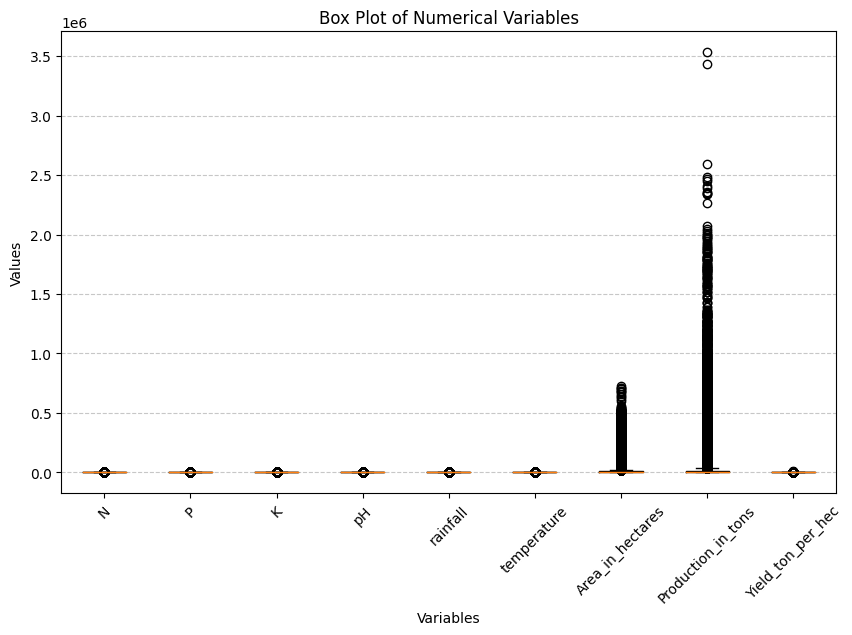

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([df['N'], df['P'], df['K'], df['pH'], df['rainfall'], df['temperature'], df['Area_in_hectares'], df['Production_in_tons'], df['Yield_ton_per_hec']])
plt.xticks(ticks=range(1, 10), labels=['N','P','K','pH','rainfall','temperature','Area_in_hectares','Production_in_tons','Yield_ton_per_hec'], rotation=45)
plt.title("Box Plot of Numerical Variables")
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(axis='y', linestyle = '--', alpha=0.7)
plt.show()


## **Dimensionality Reduction**
we remove the following features,

    Crop_Type
    Area_in_hectares
    Production_in_tons


---


instead of them we only need,
    
    Yield_ton_per_hec


> which is the '**Production_in_tons'/'Area_in_hectares**' value.







In [ ]:
df.columns

Index(['Unnamed: 0', 'State_Name', 'Crop_Type', 'Crop', 'N', 'P', 'K', 'pH',
       'rainfall', 'temperature', 'Area_in_hectares', 'Production_in_tons',
       'Yield_ton_per_hec'],
      dtype='object')

In [ ]:
df.drop(['Unnamed: 0','Area_in_hectares','Production_in_tons'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['State_Name', 'Crop_Type', 'Crop', 'N', 'P', 'K', 'pH', 'rainfall',
       'temperature', 'Yield_ton_per_hec'],
      dtype='object')

### Counting unique Crop season types for encoding

In [ ]:
crop_season_type_count = df['Crop_Type'].value_counts()
print("Count of unique crop types: ")
print(crop_season_type_count)

# Check the unique values in the 'Crop Type' column after filtering
print("\nUnique crop season types after filtering:")
uni=df['Crop_Type'].unique()
print(uni)
print(len(uni))

# Print the number of rows and columns
print("\nNumber of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Count of unique crop types: 
Crop_Type
kharif        38758
rabi          27566
whole year    26448
summer         7077
Name: count, dtype: int64

Unique crop season types after filtering:
['kharif' 'rabi' 'summer' 'whole year']
4

Number of rows: 99849
Number of columns: 10


### Counting unique Crop types for encoding

In [ ]:
crop_type_count = df['Crop'].value_counts()
print("Count of unique crop types: ")
print(crop_type_count)

# To Check the unique values in the 'Crop' column after filtering
print("\nUnique crop types after filtering:")
print(df['Crop'].unique())

print("the total number of unique crop types is:")
print(len(df['Crop'].unique()))

Count of unique crop types: 
Crop
rice           11430
maize           9857
moong           6855
sesamum         6291
wheat           6225
rapeseed        5413
jowar           5369
potato          5324
onion           5164
sunflower       3682
cotton          3157
barley          3139
ragi            2995
sweetpotato     2899
horsegram       2784
turmeric        2562
banana          2409
soyabean        2325
coriander       2253
garlic          2138
arecanut        1154
tapioca         1134
jute            1058
cashewnuts       732
blackpepper      571
mango            330
tomato           284
brinjal          282
papaya           281
cardamom         237
ladyfinger       217
orange           146
cabbage          125
pineapple        117
cauliflower      105
grapes           104
jackfruit         90
drumstick         73
cucumber          72
bittergourd       67
watermelon        59
blackgram         58
bottlegourd       58
radish            45
pumpkin           37
carrot            28


### **Pie chart for Crop_Types visualization**📊

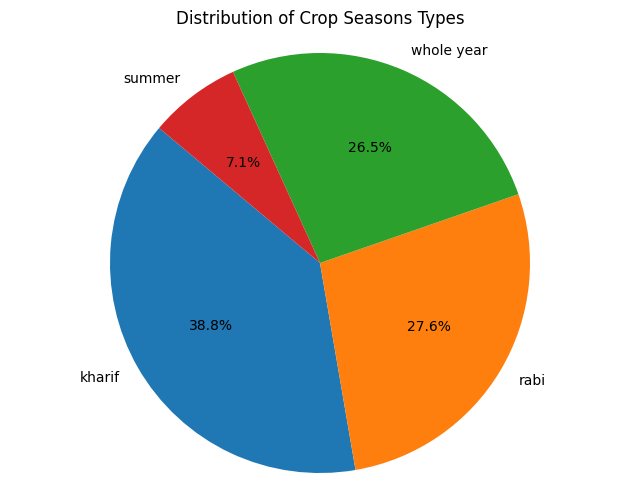

In [ ]:
# Frequency of each crop type
crop_type_count = df['Crop_Type'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(crop_type_count, labels=crop_type_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crop Seasons Types')
plt.axis('equal')  # Equal aspect ratio for circle
plt.show()


## **Plotting the crop types**

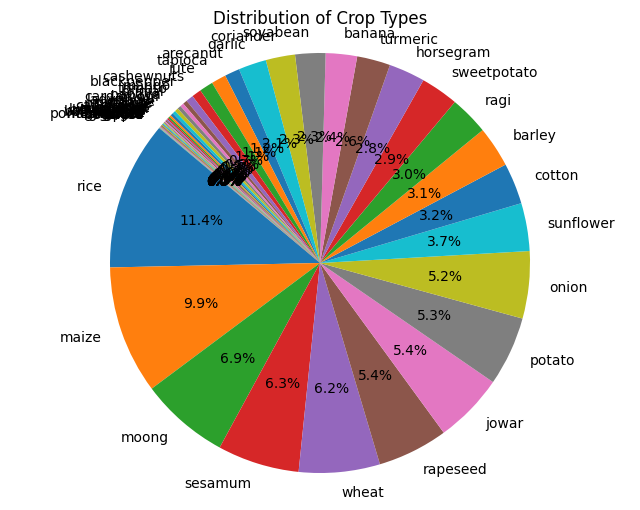

In [ ]:
# Frequency of each crop type
crop_count = df['Crop'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(crop_count, labels=crop_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crop Types')
plt.axis('equal')  # Equal aspect ratio for circle
plt.show()

😅 We have 53 crop types, so the labels and the values are overlapped, we will look for other ways to visualize this.

In [ ]:
#this some test cell. not important, just for testing code

crop_count = df['Crop'].value_counts()
print(type(crop_count))
print(crop_count)
size=crop_count.to_numpy()
print(size)

<class 'pandas.core.series.Series'>
Crop
rice           11430
maize           9857
moong           6855
sesamum         6291
wheat           6225
rapeseed        5413
jowar           5369
potato          5324
onion           5164
sunflower       3682
cotton          3157
barley          3139
ragi            2995
sweetpotato     2899
horsegram       2784
turmeric        2562
banana          2409
soyabean        2325
coriander       2253
garlic          2138
arecanut        1154
tapioca         1134
jute            1058
cashewnuts       732
blackpepper      571
mango            330
tomato           284
brinjal          282
papaya           281
cardamom         237
ladyfinger       217
orange           146
cabbage          125
pineapple        117
cauliflower      105
grapes           104
jackfruit         90
drumstick         73
cucumber          72
bittergourd       67
watermelon        59
blackgram         58
bottlegourd       58
radish            45
pumpkin           37
carrot        

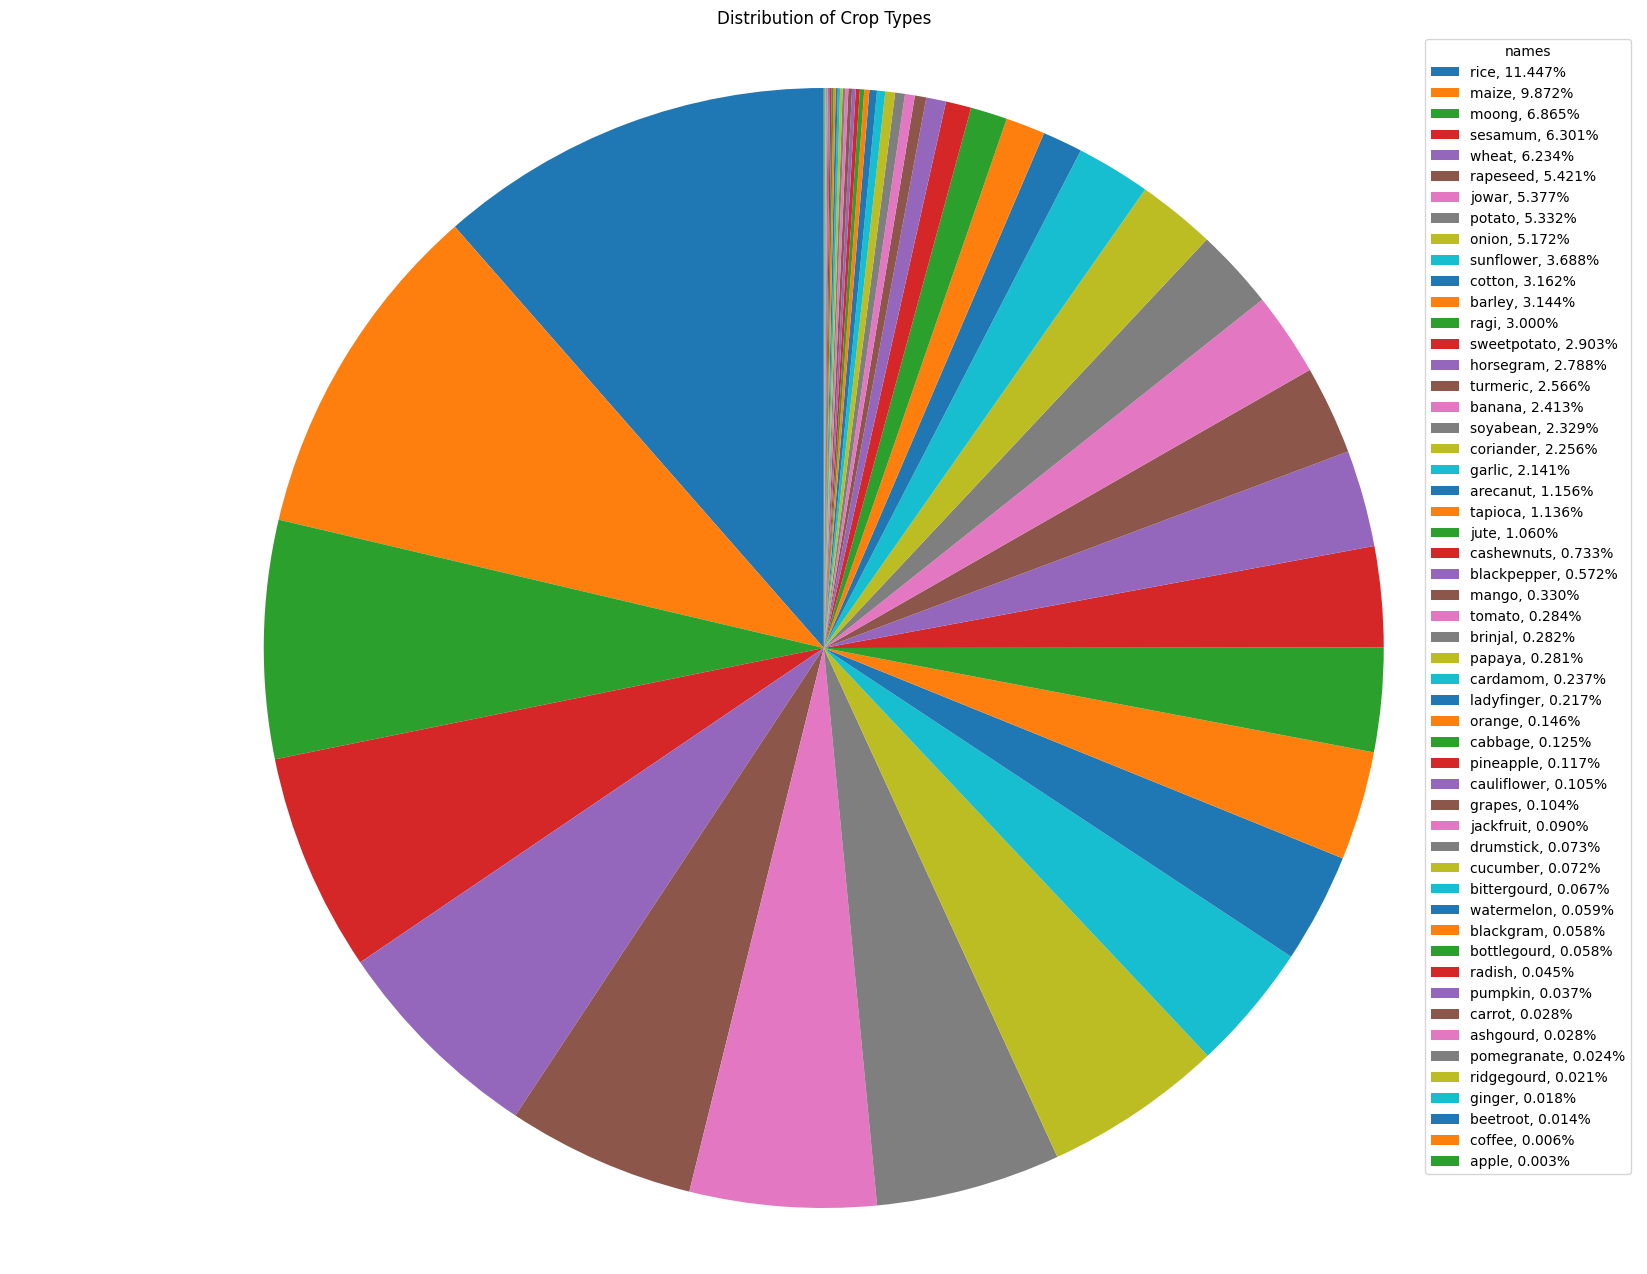

In [ ]:
# Frequency of each crop type
crop_count = df['Crop'].value_counts()
label=crop_count.index
sizeofeachcrop=crop_count.to_numpy()
sizeofeachcropinlist=sizeofeachcrop.tolist()
sumofsize=sum(sizeofeachcrop)
percentage=[x*100/sumofsize for x in sizeofeachcropinlist]
Label = [f'{l}, {s:0.3f}%' for l, s in zip(label, percentage)]
# Plotting a pie chart
plt.figure(figsize=(21,16))
plt.pie(crop_count, startangle=90,radius=1)
plt.legend(labels=Label,title='names')
plt.title('Distribution of Crop Types')
plt.axis('equal')
plt.show()

Now this looks much better

## Histogram for Crops📊

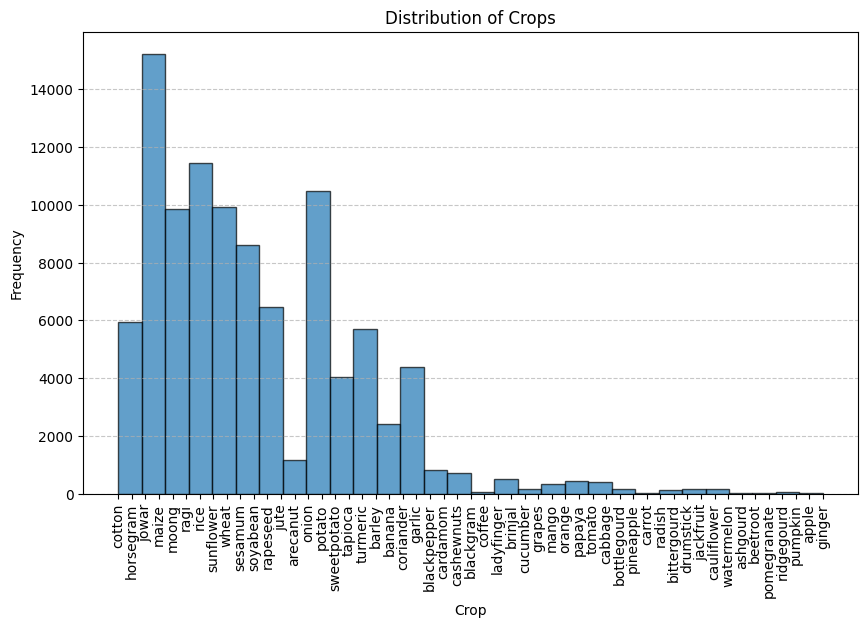

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(df['Crop'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Crop')
plt.ylabel('Frequency')
plt.title('Distribution of Crops')
plt.xticks(rotation=90)  # Rotatation of x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for y-axis
plt.show()


## Histogram for State_Names frequency📊

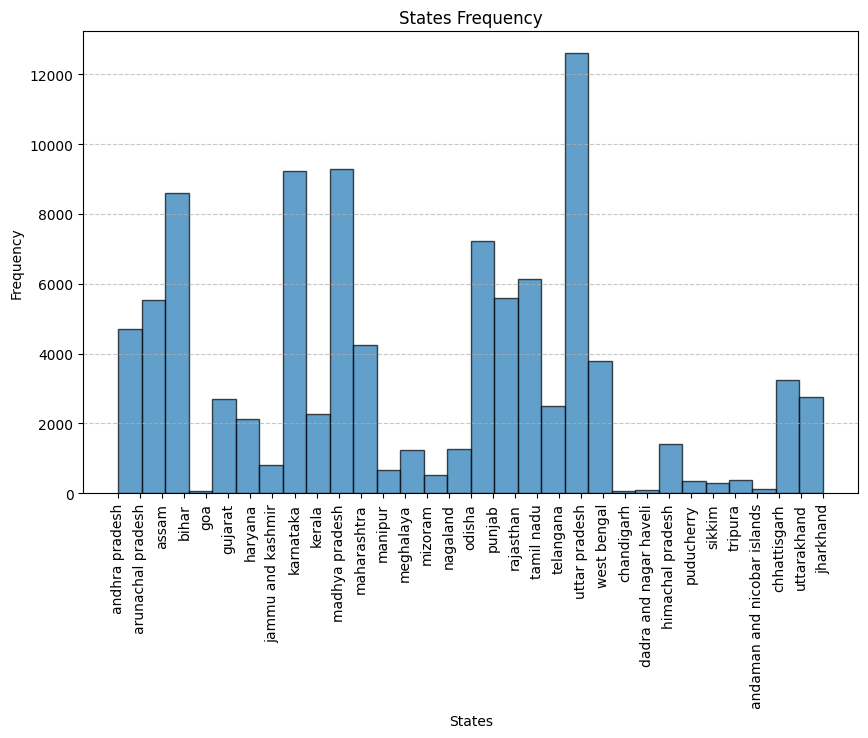

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(df['State_Name'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('States')
plt.ylabel('Frequency')
plt.title('States Frequency')
plt.xticks(rotation=90)  # Rotatation of x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for y-axis
plt.show()


In [ ]:
crop_count = df['Crop'].nunique()
print("The unique types of crops: ")
print(crop_count)

The unique types of crops: 
53


In [ ]:
state_count = df['State_Name'].nunique()
state_count

33



---



---




---



---



### we observed that the dataset has a minority class which causes class imbalances. So, we decided generate samples of that minority class using **SMOTE(Synthetic Minority Oversampling Technique)**

### now we import libraries necessary for using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#Applying SMOTE to the training data for Summer class only


smote = SMOTE(sampling_strategy = 'minority', random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
crop_type_count = df['Crop_Type'].value_counts()
print("Count of unique crop types: ")
print(crop_type_count)

# Check the unique values in the 'Crop Type' column after filtering
print("\nUnique crop types after filtering:")
print(df['Crop_Type'].unique())

# Print the number of rows and columns
print("\nNumber of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

### **Looks like the SMOTE is successfully implemented**
But, SMOTE didn't generate new samples, this happens when the ratio is sufficient in compared to other with samples.

#**Bivariate Analysis 📊**

[]

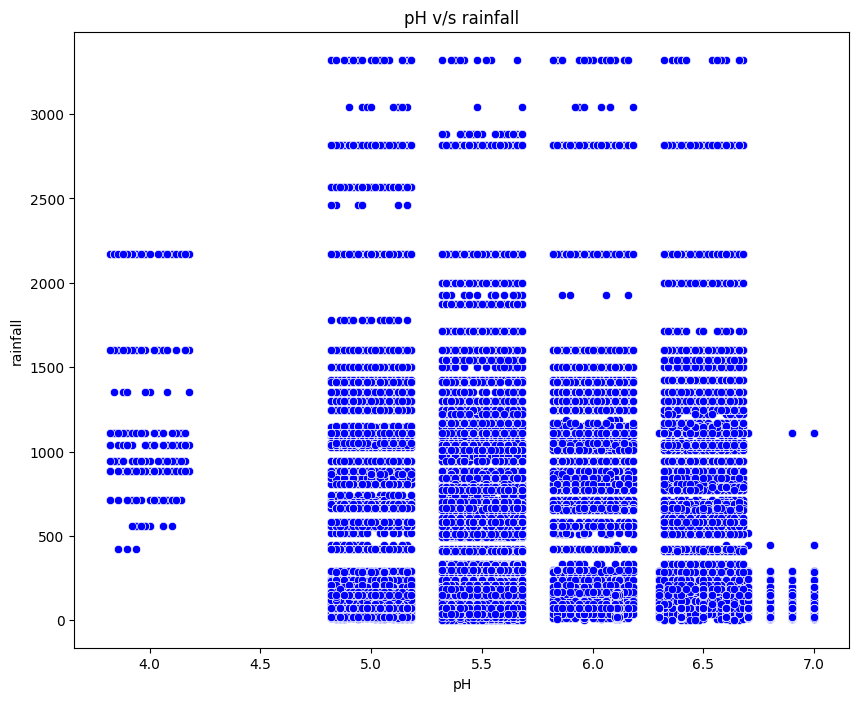

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='pH', y='rainfall', data=df, color='blue')
plt.title('pH v/s rainfall')
plt.xlabel('pH')
plt.ylabel('rainfall')
plt.plot()

## **Now we make the assumptions of linear regression, by Bivariate analysis**

### **We do this by checking if the variables in the dataset have linear relationship, if the variables (independent variables and the dependent variable aka the target variable) have linear relationship then we can use Linear regression.**

 we check the relationship between the variables in the dataset by using scatterplot

In [ ]:
df.keys()
#this is done to just recheck the names of the column names

Index(['State_Name', 'Crop_Type', 'Crop', 'N', 'P', 'K', 'pH', 'rainfall',
       'temperature', 'Yield_ton_per_hec'],
      dtype='object')

## The dependent variable is '**Yeild_ton_per_hec'**

In [ ]:
df.rename(columns={'N': 'nitrogen', 'P': 'phosphorus', 'K': 'potassium', 'Crop_Encoded':'crop name'}, inplace=True)

### The scatter plot of nitrogen vs dependent variable 📊

<Axes: xlabel='nitrogen', ylabel='Yield_ton_per_hec'>

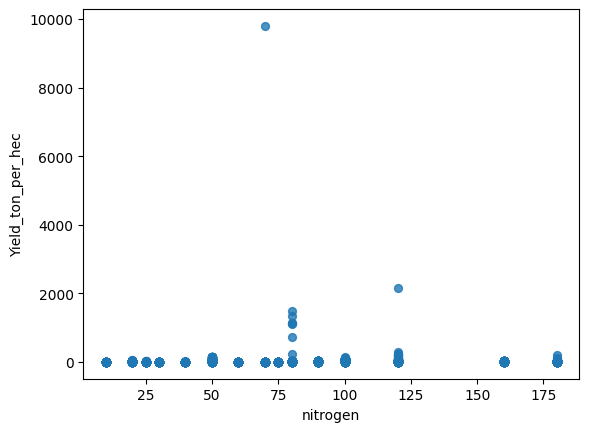

In [ ]:
df.plot(kind='scatter', x='nitrogen', y='Yield_ton_per_hec', s=32, alpha=.8)

### The scatter plot of phosphorus vs dependent variable 📊

<Axes: xlabel='phosphorus', ylabel='Yield_ton_per_hec'>

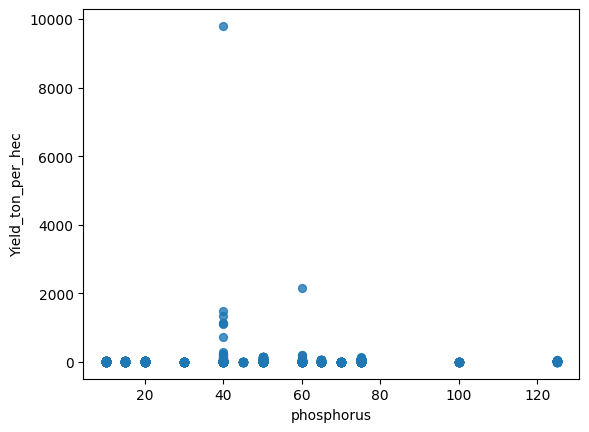

In [ ]:
df.plot(kind='scatter', x='phosphorus', y='Yield_ton_per_hec', s=32, alpha=.8)

### The scatter plot of potassium vs dependent variable 📊

<Axes: xlabel='potassium', ylabel='Yield_ton_per_hec'>

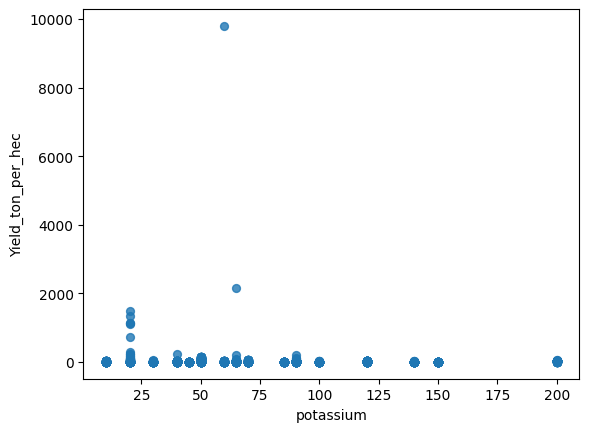

In [ ]:
df.plot(kind='scatter', x= 'potassium', y='Yield_ton_per_hec', s=32, alpha=.8)

### The scatter plot of pH vs dependent variable 📊

<Axes: xlabel='pH', ylabel='Yield_ton_per_hec'>

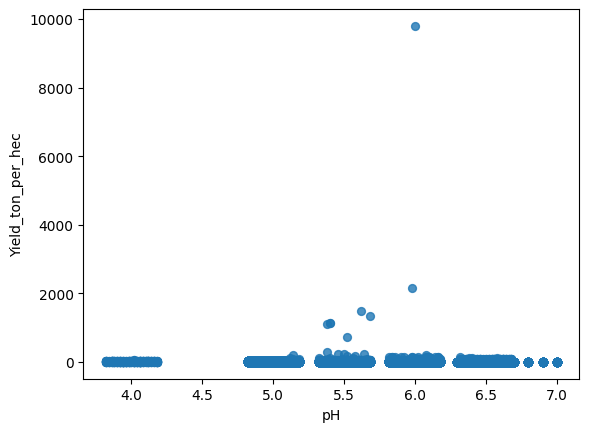

In [ ]:
df.plot(kind='scatter', x= 'pH', y='Yield_ton_per_hec', s=32, alpha=.8)

### The scatter plot of rainfall vs dependent variable 📊

<Axes: xlabel='rainfall', ylabel='Yield_ton_per_hec'>

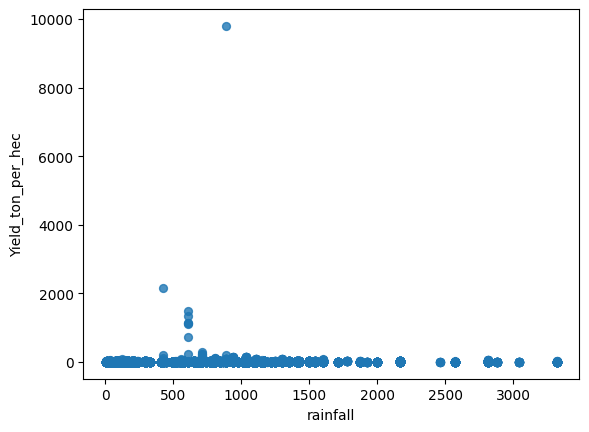

In [ ]:
df.plot(kind='scatter', x= 'rainfall', y='Yield_ton_per_hec', s=32, alpha=.8)

### The scatter plot of temperature vs dependent variable 📊

<Axes: xlabel='temperature', ylabel='Yield_ton_per_hec'>

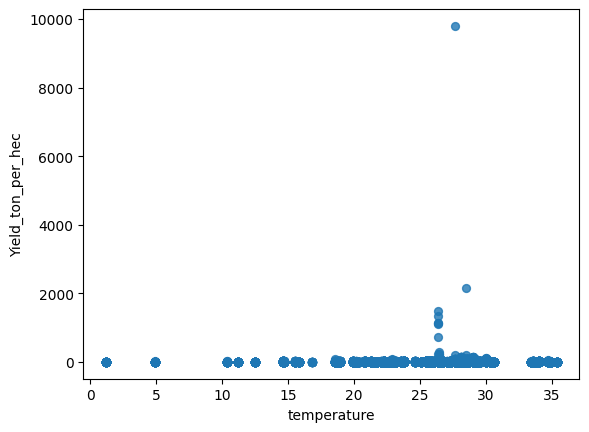

In [ ]:
df.plot(kind='scatter', x='temperature', y='Yield_ton_per_hec', s=32, alpha=.8)

###Wanted to try the plotting of the above graph 📊 using different library **(Matplotlib)** instead of **(Pandas)**

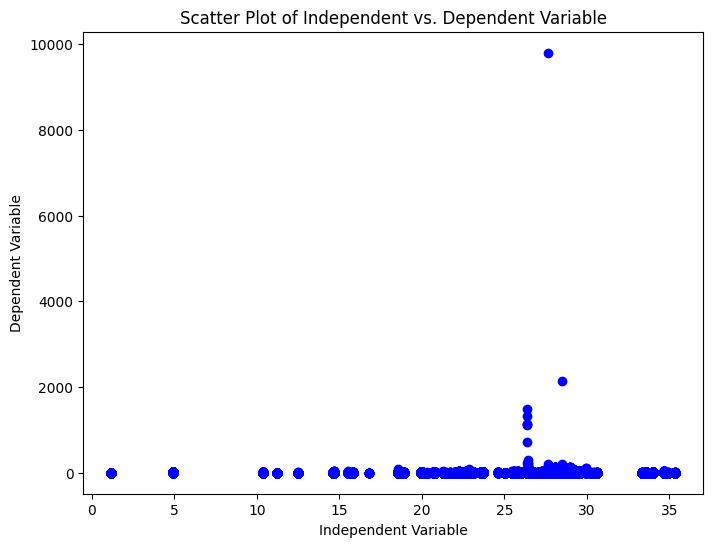

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['temperature'], df['Yield_ton_per_hec'], color='blue', label='Data Points')
plt.title('Scatter Plot of Independent vs. Dependent Variable')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()


### **We have done scatter plotting for all the independent variables and the dependent variables(target) 🎉**

We don't see much linearity in the data.

###**OUTLIERS 🥷🏻 were found in the graphs**

In the above graphs we see that the **Yield_ton_per_hec** has outliers.
So the below 2 cells are to remove the one outlier at a time and visualize it.
repeat the 2 cells until data seems to be clear of any outliers.

we have located the outlier to be at row number 83714.




In [ ]:
null_values = df['Crop_Type'].isna().sum()
print(null_values)


0


In [ ]:
ndf=df.copy(deep=True)

In [ ]:
column_name = 'Yield_ton_per_hec'
for _ in range(9):


    # Find the highest value in the specified column
    max_value = ndf[column_name].max()
    print(max_value) #run this whole cell 9 times, untill the max_value is <=300

    # Identify the row(s) with the highest value in the column
    outlier_rows = ndf[ndf[column_name] == max_value]
    print(outlier_rows)
    print(outlier_rows.index)
    # Remove the outlier row(s) from the DataFrame
    ndf = ndf.drop(outlier_rows.index).reset_index(drop=True)

    print(ndf.shape[0])

9801.0
       State_Name   Crop_Type        Crop  nitrogen  phosphorus  potassium  \
83712  tamil nadu  whole year  cashewnuts        70          40         60   

        pH  rainfall  temperature  Yield_ton_per_hec  
83712  6.0     884.5    27.654545             9801.0  
Index([83712], dtype='int64')
99848
2150.0
      State_Name   Crop_Type   Crop  nitrogen  phosphorus  potassium    pH  \
80177    haryana  whole year  onion       120          60         65  5.98   

       rainfall  temperature  Yield_ton_per_hec  
80177    421.14    28.507273             2150.0  
Index([80177], dtype='int64')
99847
1494.0
       State_Name Crop_Type   Crop  nitrogen  phosphorus  potassium    pH  \
2278  maharashtra    kharif  maize        80          40         20  5.62   

      rainfall  temperature  Yield_ton_per_hec  
2278    607.48    26.366667             1494.0  
Index([2278], dtype='int64')
99846
1326.6666666666667
       State_Name Crop_Type   Crop  nitrogen  phosphorus  potassium    pH  \

In [ ]:
ndf.tail()

,State_Name,Crop_Type,Crop,nitrogen,phosphorus,potassium,pH,rainfall,temperature,Yield_ton_per_hec
99835,west bengal,rabi,wheat,60,30,30,6.70,152.54,22.28,2.559364
99836,west bengal,summer,maize,80,40,20,5.68,182.50,29.20,1.515504
99837,west bengal,summer,rice,80,40,40,5.64,182.50,29.20,2.676190
99838,west bengal,rabi,rice,80,40,40,5.42,152.54,22.28,1.712352
99839,west bengal,rabi,sesamum,30,15,30,6.54,152.54,22.28,0.389344


In [ ]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99840 entries, 0 to 99839
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State_Name         99840 non-null  object 
 1   Crop_Type          99840 non-null  object 
 2   Crop               99840 non-null  object 
 3   nitrogen           99840 non-null  int64  
 4   phosphorus         99840 non-null  int64  
 5   potassium          99840 non-null  int64  
 6   pH                 99840 non-null  float64
 7   rainfall           99840 non-null  float64
 8   temperature        99840 non-null  float64
 9   Yield_ton_per_hec  99840 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 7.6+ MB


In [ ]:
null_values = ndf['Crop_Type'].isna().sum()
print(null_values)

0


<Axes: xlabel='temperature', ylabel='Yield_ton_per_hec'>

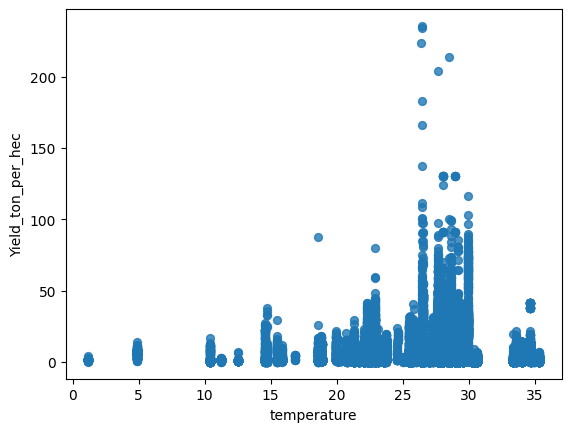

In [ ]:
ndf.plot(kind='scatter', x='temperature', y='Yield_ton_per_hec', s=32, alpha=.8)

In [ ]:
ndf.columns

Index(['State_Name', 'Crop_Type', 'Crop', 'nitrogen', 'phosphorus',
       'potassium', 'pH', 'rainfall', 'temperature', 'Yield_ton_per_hec'],
      dtype='object')

In [ ]:
null_values = ndf['Crop_Type'].isnull()
filter=ndf[null_values]
# Print the boolean Series
filter.head()

,State_Name,Crop_Type,Crop,nitrogen,phosphorus,potassium,pH,rainfall,temperature,Yield_ton_per_hec


# **Encoding categorical variables**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import LabelEncoder

### Encoding the Indian state names using one hot encoding

but before doing that we can see that there are 33 state names. and if we do one hot encoding to all of them we will have 33 extra columns. and that increases the dimensions of the dataset and we will end up facing the **curse of dimentions.** 🙅🏻‍♂️👎🏻

So what we will do is, we will group the states based on their position on the map.

In [ ]:
null_values = df['Crop_Type'].isna().sum()
print(null_values)


0


In [ ]:
df=ndf.copy(deep=True)

In [ ]:
df.tail()

,State_Name,Crop_Type,Crop,nitrogen,phosphorus,potassium,pH,rainfall,temperature,Yield_ton_per_hec
99835,west bengal,rabi,wheat,60,30,30,6.70,152.54,22.28,2.559364
99836,west bengal,summer,maize,80,40,20,5.68,182.50,29.20,1.515504
99837,west bengal,summer,rice,80,40,40,5.64,182.50,29.20,2.676190
99838,west bengal,rabi,rice,80,40,40,5.42,152.54,22.28,1.712352
99839,west bengal,rabi,sesamum,30,15,30,6.54,152.54,22.28,0.389344


In [ ]:
null_values = df['Crop_Type'].isna()
print(null_values)

0        False
1        False
2        False
3        False
4        False
         ...  
99835    False
99836    False
99837    False
99838    False
99839    False
Name: Crop_Type, Length: 99840, dtype: bool


In [ ]:
max_value = df[column_name].max()
print(max_value)

235.5555555555556


In [ ]:
state_to_region = {
    'andaman and nicobar islands': 'South',
    'andhra pradesh': 'South',
    'arunachal pradesh': 'North',
    'assam': 'North',
    'bihar': 'East',
    'chandigarh': 'North',
    'chhattisgarh': 'East',
    'dadra and nagar haveli': 'West',
    'goa': 'West',
    'gujarat': 'West',
    'haryana': 'North',
    'himachal pradesh': 'North',
    'jammu and kashmir': 'North',
    'jharkhand': 'East',
    'karnataka': 'South',
    'kerala': 'South',
    'madhya pradesh': 'West',
    'maharashtra': 'West',
    'manipur': 'North',
    'meghalaya': 'North',
    'mizoram': 'North',
    'nagaland': 'North',
    'odisha': 'East',
    'puducherry': 'South',
    'punjab': 'North',
    'rajasthan': 'West',
    'sikkim': 'North',
    'tamil nadu': 'South',
    'telangana': 'South',
    'tripura': 'North',
    'uttar pradesh': 'North',
    'uttarakhand': 'North',
    'west bengal': 'East'
}
df['Region'] = df['State_Name'].map(state_to_region)
region_counts = df['Region'].value_counts()
print(region_counts)

Region
North    30648
South    24412
East     22821
West     21959
Name: count, dtype: int64


In [ ]:
df.columns

Index(['State_Name', 'Crop_Type', 'Crop', 'nitrogen', 'phosphorus',
       'potassium', 'pH', 'rainfall', 'temperature', 'Yield_ton_per_hec',
       'Region'],
      dtype='object')

In [ ]:
null_values = df['Region'].isna().sum()
print(null_values)
df.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99840 entries, 0 to 99839
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State_Name         99840 non-null  object 
 1   Crop_Type          99840 non-null  object 
 2   Crop               99840 non-null  object 
 3   nitrogen           99840 non-null  int64  
 4   phosphorus         99840 non-null  int64  
 5   potassium          99840 non-null  int64  
 6   pH                 99840 non-null  float64
 7   rainfall           99840 non-null  float64
 8   temperature        99840 non-null  float64
 9   Yield_ton_per_hec  99840 non-null  float64
 10  Region             99840 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 8.4+ MB


In [ ]:
data = df['Region']
encoder = OneHotEncoder(sparse_output=False)
data_reshaped = data.values.reshape(-1, 1)

one_hot_encoded = encoder.fit_transform(data_reshaped)

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.categories_[0])


In [ ]:
print(encoder.categories_)

[array(['East', 'North', 'South', 'West'], dtype=object)]


In [ ]:
one_hot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99840 entries, 0 to 99839
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   East    99840 non-null  float64
 1   North   99840 non-null  float64
 2   South   99840 non-null  float64
 3   West    99840 non-null  float64
dtypes: float64(4)
memory usage: 3.0 MB


In [ ]:
df = pd.concat([df, one_hot_df], axis=1)

In [ ]:
null_values = df['Region'].isnull()
filter=df[null_values]
# Print the boolean Series
filter.head()

,State_Name,Crop_Type,Crop,nitrogen,phosphorus,potassium,pH,rainfall,temperature,Yield_ton_per_hec,Region,East,North,South,West


In [ ]:
df=df.drop(['Region','State_Name'], axis=1)

In [ ]:
df.head(10)

,Crop_Type,Crop,nitrogen,phosphorus,potassium,pH,rainfall,temperature,Yield_ton_per_hec,East,North,South,West
0,kharif,cotton,120,40,20,5.46,654.34,29.266667,1.287671,0.0,0.0,1.0,0.0
1,kharif,horsegram,20,60,20,6.18,654.34,29.266667,0.303030,0.0,0.0,1.0,0.0
2,kharif,jowar,80,40,40,5.42,654.34,29.266667,1.009901,0.0,0.0,1.0,0.0
3,kharif,maize,80,40,20,5.62,654.34,29.266667,1.750000,0.0,0.0,1.0,0.0
4,kharif,moong,20,40,20,5.68,654.34,29.266667,0.384615,0.0,0.0,1.0,0.0
5,kharif,ragi,50,40,20,5.64,654.34,29.266667,1.761194,0.0,0.0,1.0,0.0
6,kharif,rice,80,40,40,5.54,654.34,29.266667,2.117978,0.0,0.0,1.0,0.0
7,kharif,sunflower,50,60,30,5.36,654.34,29.266667,0.309192,0.0,0.0,1.0,0.0
8,rabi,horsegram,20,60,20,6.00,288.30,25.460000,0.333333,0.0,0.0,1.0,0.0
9,rabi,jowar,80,40,40,5.50,288.30,25.460000,0.500000,0.0,0.0,1.0,0.0


In [ ]:
null_values = df['Crop_Type'].isna()
print(null_values)
null_values = df['Crop_Type'].isna().sum()
print(null_values)

0        False
1        False
2        False
3        False
4        False
         ...  
99835    False
99836    False
99837    False
99838    False
99839    False
Name: Crop_Type, Length: 99840, dtype: bool
0


### Encoding the Crop Types using One Hot Encoding

In [ ]:
data = df['Crop_Type']
encoder = OneHotEncoder(sparse_output=False)
data_reshaped = data.values.reshape(-1, 1)

one_hot_encoded = encoder.fit_transform(data_reshaped)

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.categories_[0])


In [ ]:
df = pd.concat([df, one_hot_df], axis=1)

In [ ]:
one_hot_df.head()

,kharif,rabi,summer,whole year
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [ ]:
df.head()

,Crop_Type,Crop,nitrogen,phosphorus,potassium,pH,rainfall,temperature,Yield_ton_per_hec,East,North,South,West,kharif,rabi,summer,whole year
0,kharif,cotton,120,40,20,5.46,654.34,29.266667,1.287671,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,kharif,horsegram,20,60,20,6.18,654.34,29.266667,0.303030,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,kharif,jowar,80,40,40,5.42,654.34,29.266667,1.009901,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,kharif,maize,80,40,20,5.62,654.34,29.266667,1.750000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,kharif,moong,20,40,20,5.68,654.34,29.266667,0.384615,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


now we drop the crop_type vaiable as we have encoded it and added it back in the df

In [ ]:
df=df.drop(['Crop_Type'], axis=1)

In [ ]:
print(len(encoder.categories_))
print((encoder.categories_))

1
[array(['kharif', 'rabi', 'summer', 'whole year'], dtype=object)]


In [ ]:
#now we make a copy
cdf=df.copy(deep=True)

### now we encode **Crop** variable using **one hot encoding**

In [ ]:
data = df['Crop']
encoder = OneHotEncoder(sparse_output=False)
data_reshaped = data.values.reshape(-1, 1)

one_hot_encoded = encoder.fit_transform(data_reshaped)

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.categories_[0])

In [ ]:
print(encoder.categories_[0])
print(len(encoder.categories_))

['apple' 'arecanut' 'ashgourd' 'banana' 'barley' 'beetroot' 'bittergourd'
 'blackgram' 'blackpepper' 'bottlegourd' 'brinjal' 'cabbage' 'cardamom'
 'carrot' 'cashewnuts' 'cauliflower' 'coffee' 'coriander' 'cotton'
 'cucumber' 'drumstick' 'garlic' 'ginger' 'grapes' 'horsegram' 'jackfruit'
 'jowar' 'jute' 'ladyfinger' 'maize' 'mango' 'moong' 'onion' 'orange'
 'papaya' 'pineapple' 'pomegranate' 'potato' 'pumpkin' 'radish' 'ragi'
 'rapeseed' 'rice' 'ridgegourd' 'sesamum' 'soyabean' 'sunflower'
 'sweetpotato' 'tapioca' 'tomato' 'turmeric' 'watermelon' 'wheat']
1


In [ ]:
df = pd.concat([df, one_hot_df], axis=1)

now we drop the **"CROP"** variable as we have one hot encoded it

In [ ]:
df=df.drop(['Crop'], axis=1)

In [ ]:
df.head()

,nitrogen,phosphorus,potassium,pH,rainfall,temperature,Yield_ton_per_hec,East,North,South,...,ridgegourd,sesamum,soyabean,sunflower,sweetpotato,tapioca,tomato,turmeric,watermelon,wheat
0,120,40,20,5.46,654.34,29.266667,1.287671,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20,60,20,6.18,654.34,29.266667,0.303030,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80,40,40,5.42,654.34,29.266667,1.009901,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,80,40,20,5.62,654.34,29.266667,1.750000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20,40,20,5.68,654.34,29.266667,0.384615,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(type(df))
df.columns

<class 'pandas.core.frame.DataFrame'>


Index(['nitrogen', 'phosphorus', 'potassium', 'pH', 'rainfall', 'temperature',
       'Yield_ton_per_hec', 'East', 'North', 'South', 'West', 'kharif', 'rabi',
       'summer', 'whole year', 'apple', 'arecanut', 'ashgourd', 'banana',
       'barley', 'beetroot', 'bittergourd', 'blackgram', 'blackpepper',
       'bottlegourd', 'brinjal', 'cabbage', 'cardamom', 'carrot', 'cashewnuts',
       'cauliflower', 'coffee', 'coriander', 'cotton', 'cucumber', 'drumstick',
       'garlic', 'ginger', 'grapes', 'horsegram', 'jackfruit', 'jowar', 'jute',
       'ladyfinger', 'maize', 'mango', 'moong', 'onion', 'orange', 'papaya',
       'pineapple', 'pomegranate', 'potato', 'pumpkin', 'radish', 'ragi',
       'rapeseed', 'rice', 'ridgegourd', 'sesamum', 'soyabean', 'sunflower',
       'sweetpotato', 'tapioca', 'tomato', 'turmeric', 'watermelon', 'wheat'],
      dtype='object')

In [ ]:
df.shape

(99840, 68)

Concatenate the one-hot encoded Indian States with the features

### now we will do **label** **encoding** on **'Crop'** to the copy of the dataframe we made earlier

In [ ]:
cdf.columns

Index(['Crop', 'nitrogen', 'phosphorus', 'potassium', 'pH', 'rainfall',
       'temperature', 'Yield_ton_per_hec', 'East', 'North', 'South', 'West',
       'kharif', 'rabi', 'summer', 'whole year'],
      dtype='object')

In [ ]:
crop_encoder = LabelEncoder()
cdf['Crop_Encoded'] = crop_encoder.fit_transform(cdf['Crop'])
cdf=cdf.drop(cdf.columns[[0]], axis=1, inplace=False)

#**Now we move to the next step, Univariate analysis** 📊

## **Understanding the distribution of the data.**
this is done by Plotting the histograms of individual variables (both the dependent and independent)

In [ ]:
df.columns


Index(['nitrogen', 'phosphorus', 'potassium', 'pH', 'rainfall', 'temperature',
       'Yield_ton_per_hec', 'East', 'North', 'South', 'West', 'kharif', 'rabi',
       'summer', 'whole year', 'apple', 'arecanut', 'ashgourd', 'banana',
       'barley', 'beetroot', 'bittergourd', 'blackgram', 'blackpepper',
       'bottlegourd', 'brinjal', 'cabbage', 'cardamom', 'carrot', 'cashewnuts',
       'cauliflower', 'coffee', 'coriander', 'cotton', 'cucumber', 'drumstick',
       'garlic', 'ginger', 'grapes', 'horsegram', 'jackfruit', 'jowar', 'jute',
       'ladyfinger', 'maize', 'mango', 'moong', 'onion', 'orange', 'papaya',
       'pineapple', 'pomegranate', 'potato', 'pumpkin', 'radish', 'ragi',
       'rapeseed', 'rice', 'ridgegourd', 'sesamum', 'soyabean', 'sunflower',
       'sweetpotato', 'tapioca', 'tomato', 'turmeric', 'watermelon', 'wheat'],
      dtype='object')

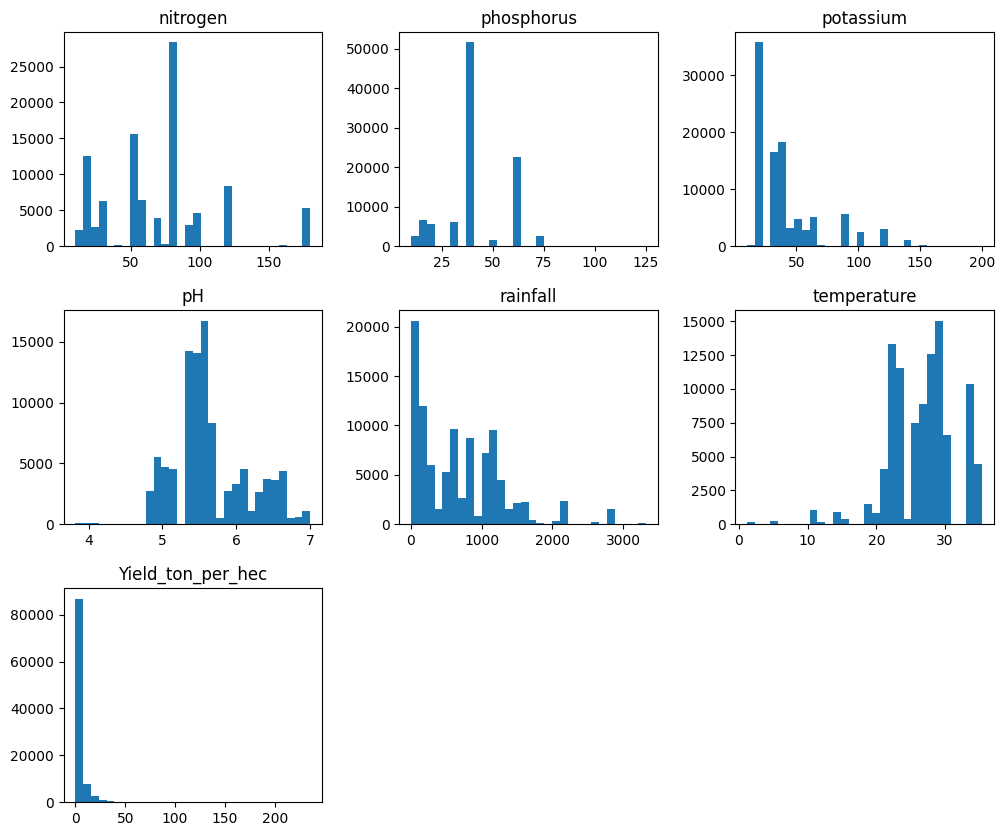

In [ ]:

N_data = df['nitrogen']
P_data = df['phosphorus']
K_data = df['potassium']
pH_data = df['pH']
rainfall_data = df['rainfall']
temperature_data = df['temperature']
Yield_ton_per_hec_data = df['Yield_ton_per_hec']

DF=df[['nitrogen', 'phosphorus', 'potassium', 'pH', 'rainfall', 'temperature','Yield_ton_per_hec']]
DF.hist(bins=30, figsize=(12, 10),grid=False)

plt.show()


The distribution is not in good shape, especially if we look at **'Yield_ton_per_hec'** distribution we can see that its very poorly distributed.

To tackle this issue we will use transformations

###The types of transformations are :-

    Log Transformation
    Square-Root Transformation
    Reciprocal Transformation
    Box-Cox Transformation

### we will go with the **log transformation** for it's simplicity and effectiveness

In [ ]:

N = np.log(N_data + 1)  # Adding 1 to avoid log(0)
P = np.log(P_data + 1)
K = np.log(K_data + 1)
pH = np.log(pH_data + 1)
rainfall = np.log(rainfall_data + 1)
temperature = np.log(temperature_data + 1)
Yield_ton_per_hec = np.log(Yield_ton_per_hec_data + 1)

new_df = pd.concat([N ,
P,
K ,
pH ,
rainfall ,
temperature,
Yield_ton_per_hec], axis=1)

new_df.columns


Index(['nitrogen', 'phosphorus', 'potassium', 'pH', 'rainfall', 'temperature',
       'Yield_ton_per_hec'],
      dtype='object')

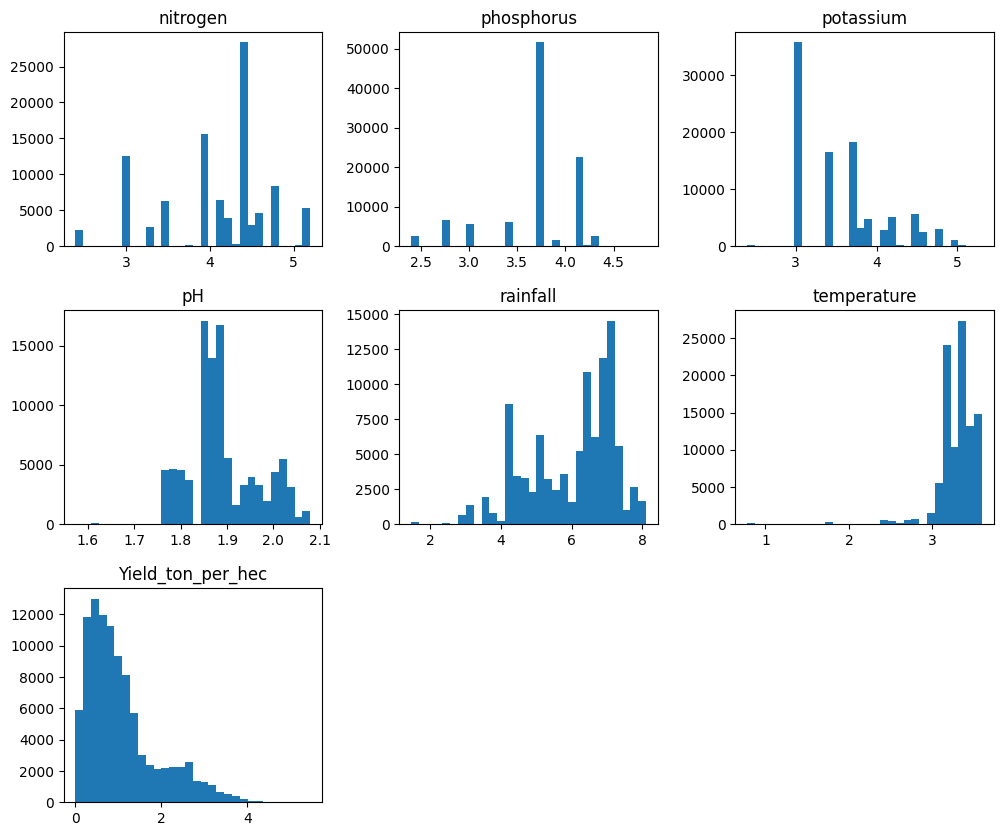

In [ ]:
new_df.hist(bins=30, figsize=(12, 10),grid=False)

plt.show()

### **Now the Distribution is much better and spread out**

In [ ]:
DF=new_df.copy(deep=True)

In [ ]:
DF.columns

Index(['nitrogen', 'phosphorus', 'potassium', 'pH', 'rainfall', 'temperature',
       'Yield_ton_per_hec'],
      dtype='object')

###Now lets do the graph plotting of a single variable to have a in-depth look at what's happening after the log transformation.

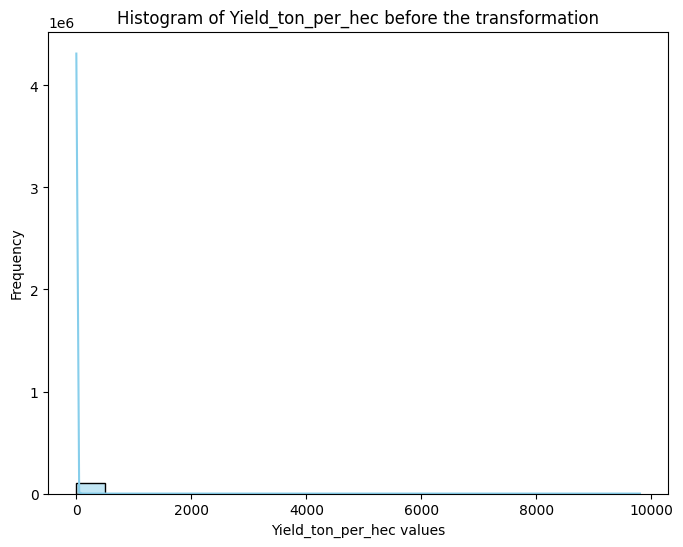

In [ ]:
ddf=pd.read_csv('/content/Crop_production.csv')
plt.figure(figsize=(8, 6))
sns.histplot(ddf['Yield_ton_per_hec'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Yield_ton_per_hec before the transformation')
plt.xlabel('Yield_ton_per_hec values')
plt.ylabel('Frequency')
plt.show()

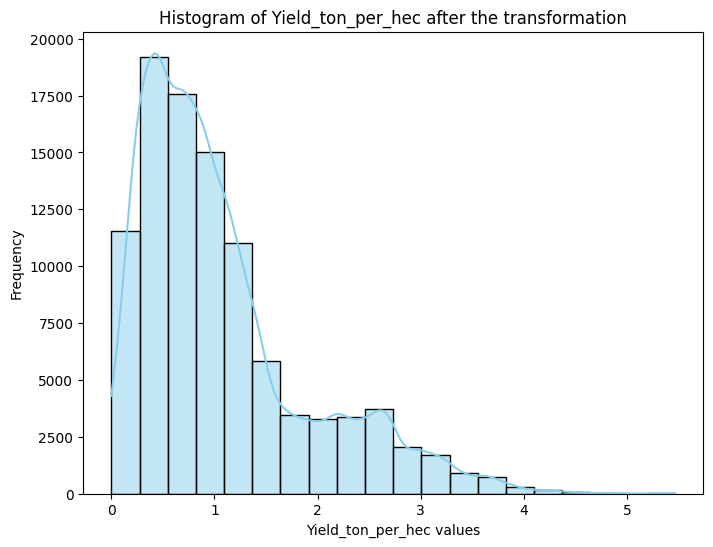

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(DF['Yield_ton_per_hec'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Yield_ton_per_hec after the transformation')
plt.xlabel('Yield_ton_per_hec values')
plt.ylabel('Frequency')
plt.show()

In [ ]:
DF.head()

,nitrogen,phosphorus,potassium,pH,rainfall,temperature,Yield_ton_per_hec
0,4.795791,3.713572,3.044522,1.865629,6.485154,3.410047,0.827534
1,3.044522,4.110874,3.044522,1.971299,6.485154,3.410047,0.264693
2,4.394449,3.713572,3.713572,1.859418,6.485154,3.410047,0.698085
3,4.394449,3.713572,3.044522,1.890095,6.485154,3.410047,1.011601
4,3.044522,3.713572,3.044522,1.899118,6.485154,3.410047,0.325422


###Now Let's plot a Q-Q plot

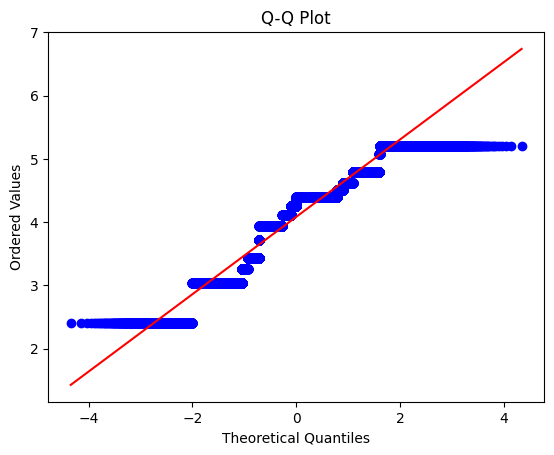

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

feature_data = DF['nitrogen']
# Plotting the Q-Q plot
stats.probplot(feature_data, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

##**Now lets merge the transformed valriables with the original dataframe**

In [ ]:
df.shape
df.columns

Index(['nitrogen', 'phosphorus', 'potassium', 'pH', 'rainfall', 'temperature',
       'Yield_ton_per_hec', 'East', 'North', 'South', 'West', 'kharif', 'rabi',
       'summer', 'whole year', 'apple', 'arecanut', 'ashgourd', 'banana',
       'barley', 'beetroot', 'bittergourd', 'blackgram', 'blackpepper',
       'bottlegourd', 'brinjal', 'cabbage', 'cardamom', 'carrot', 'cashewnuts',
       'cauliflower', 'coffee', 'coriander', 'cotton', 'cucumber', 'drumstick',
       'garlic', 'ginger', 'grapes', 'horsegram', 'jackfruit', 'jowar', 'jute',
       'ladyfinger', 'maize', 'mango', 'moong', 'onion', 'orange', 'papaya',
       'pineapple', 'pomegranate', 'potato', 'pumpkin', 'radish', 'ragi',
       'rapeseed', 'rice', 'ridgegourd', 'sesamum', 'soyabean', 'sunflower',
       'sweetpotato', 'tapioca', 'tomato', 'turmeric', 'watermelon', 'wheat'],
      dtype='object')

In [ ]:
print(ndf.shape)
ndf.columns

(99840, 10)


Index(['State_Name', 'Crop_Type', 'Crop', 'nitrogen', 'phosphorus',
       'potassium', 'pH', 'rainfall', 'temperature', 'Yield_ton_per_hec'],
      dtype='object')

In [ ]:
print(DF.shape)
DF.columns

(99840, 7)


Index(['nitrogen', 'phosphorus', 'potassium', 'pH', 'rainfall', 'temperature',
       'Yield_ton_per_hec'],
      dtype='object')

In [ ]:
cdf.columns

Index(['nitrogen', 'phosphorus', 'potassium', 'pH', 'rainfall', 'temperature',
       'Yield_ton_per_hec', 'East', 'North', 'South', 'West', 'kharif', 'rabi',
       'summer', 'whole year', 'Crop_Encoded'],
      dtype='object')

In [ ]:
DFOH = df[[ 'East', 'North', 'South', 'West', 'kharif', 'rabi',                 #one hot encoded
       'summer', 'whole year', 'apple', 'arecanut', 'ashgourd', 'banana',
       'barley', 'beetroot', 'bittergourd', 'blackgram', 'blackpepper',
       'bottlegourd', 'brinjal', 'cabbage', 'cardamom', 'carrot', 'cashewnuts',
       'cauliflower', 'coffee', 'coriander', 'cotton', 'cucumber', 'drumstick',
       'garlic', 'ginger', 'grapes', 'horsegram', 'jackfruit', 'jowar', 'jute',
       'ladyfinger', 'maize', 'mango', 'moong', 'onion', 'orange', 'papaya',
       'pineapple', 'pomegranate', 'potato', 'pumpkin', 'radish', 'ragi',
       'rapeseed', 'rice', 'ridgegourd', 'sesamum', 'soyabean', 'sunflower',
       'sweetpotato', 'tapioca', 'tomato', 'turmeric', 'watermelon', 'wheat']]

DFL= cdf[['East', 'North', 'South', 'West', 'kharif', 'rabi',                   #label encoded
       'summer', 'whole year', 'Crop_Encoded']]

# Concatenate along columns (axis=1)
finalOHDF = pd.concat([DF,DFOH], axis=1)
finalLDF = pd.concat([DF,DFL], axis=1)



In [ ]:
finalOHDF.columns

Index(['nitrogen', 'phosphorus', 'potassium', 'pH', 'rainfall', 'temperature',
       'Yield_ton_per_hec', 'East', 'North', 'South', 'West', 'kharif', 'rabi',
       'summer', 'whole year', 'apple', 'arecanut', 'ashgourd', 'banana',
       'barley', 'beetroot', 'bittergourd', 'blackgram', 'blackpepper',
       'bottlegourd', 'brinjal', 'cabbage', 'cardamom', 'carrot', 'cashewnuts',
       'cauliflower', 'coffee', 'coriander', 'cotton', 'cucumber', 'drumstick',
       'garlic', 'ginger', 'grapes', 'horsegram', 'jackfruit', 'jowar', 'jute',
       'ladyfinger', 'maize', 'mango', 'moong', 'onion', 'orange', 'papaya',
       'pineapple', 'pomegranate', 'potato', 'pumpkin', 'radish', 'ragi',
       'rapeseed', 'rice', 'ridgegourd', 'sesamum', 'soyabean', 'sunflower',
       'sweetpotato', 'tapioca', 'tomato', 'turmeric', 'watermelon', 'wheat'],
      dtype='object')

In [ ]:
finalOHDF.shape

(99840, 68)

# **Multivariate Analysis📊**

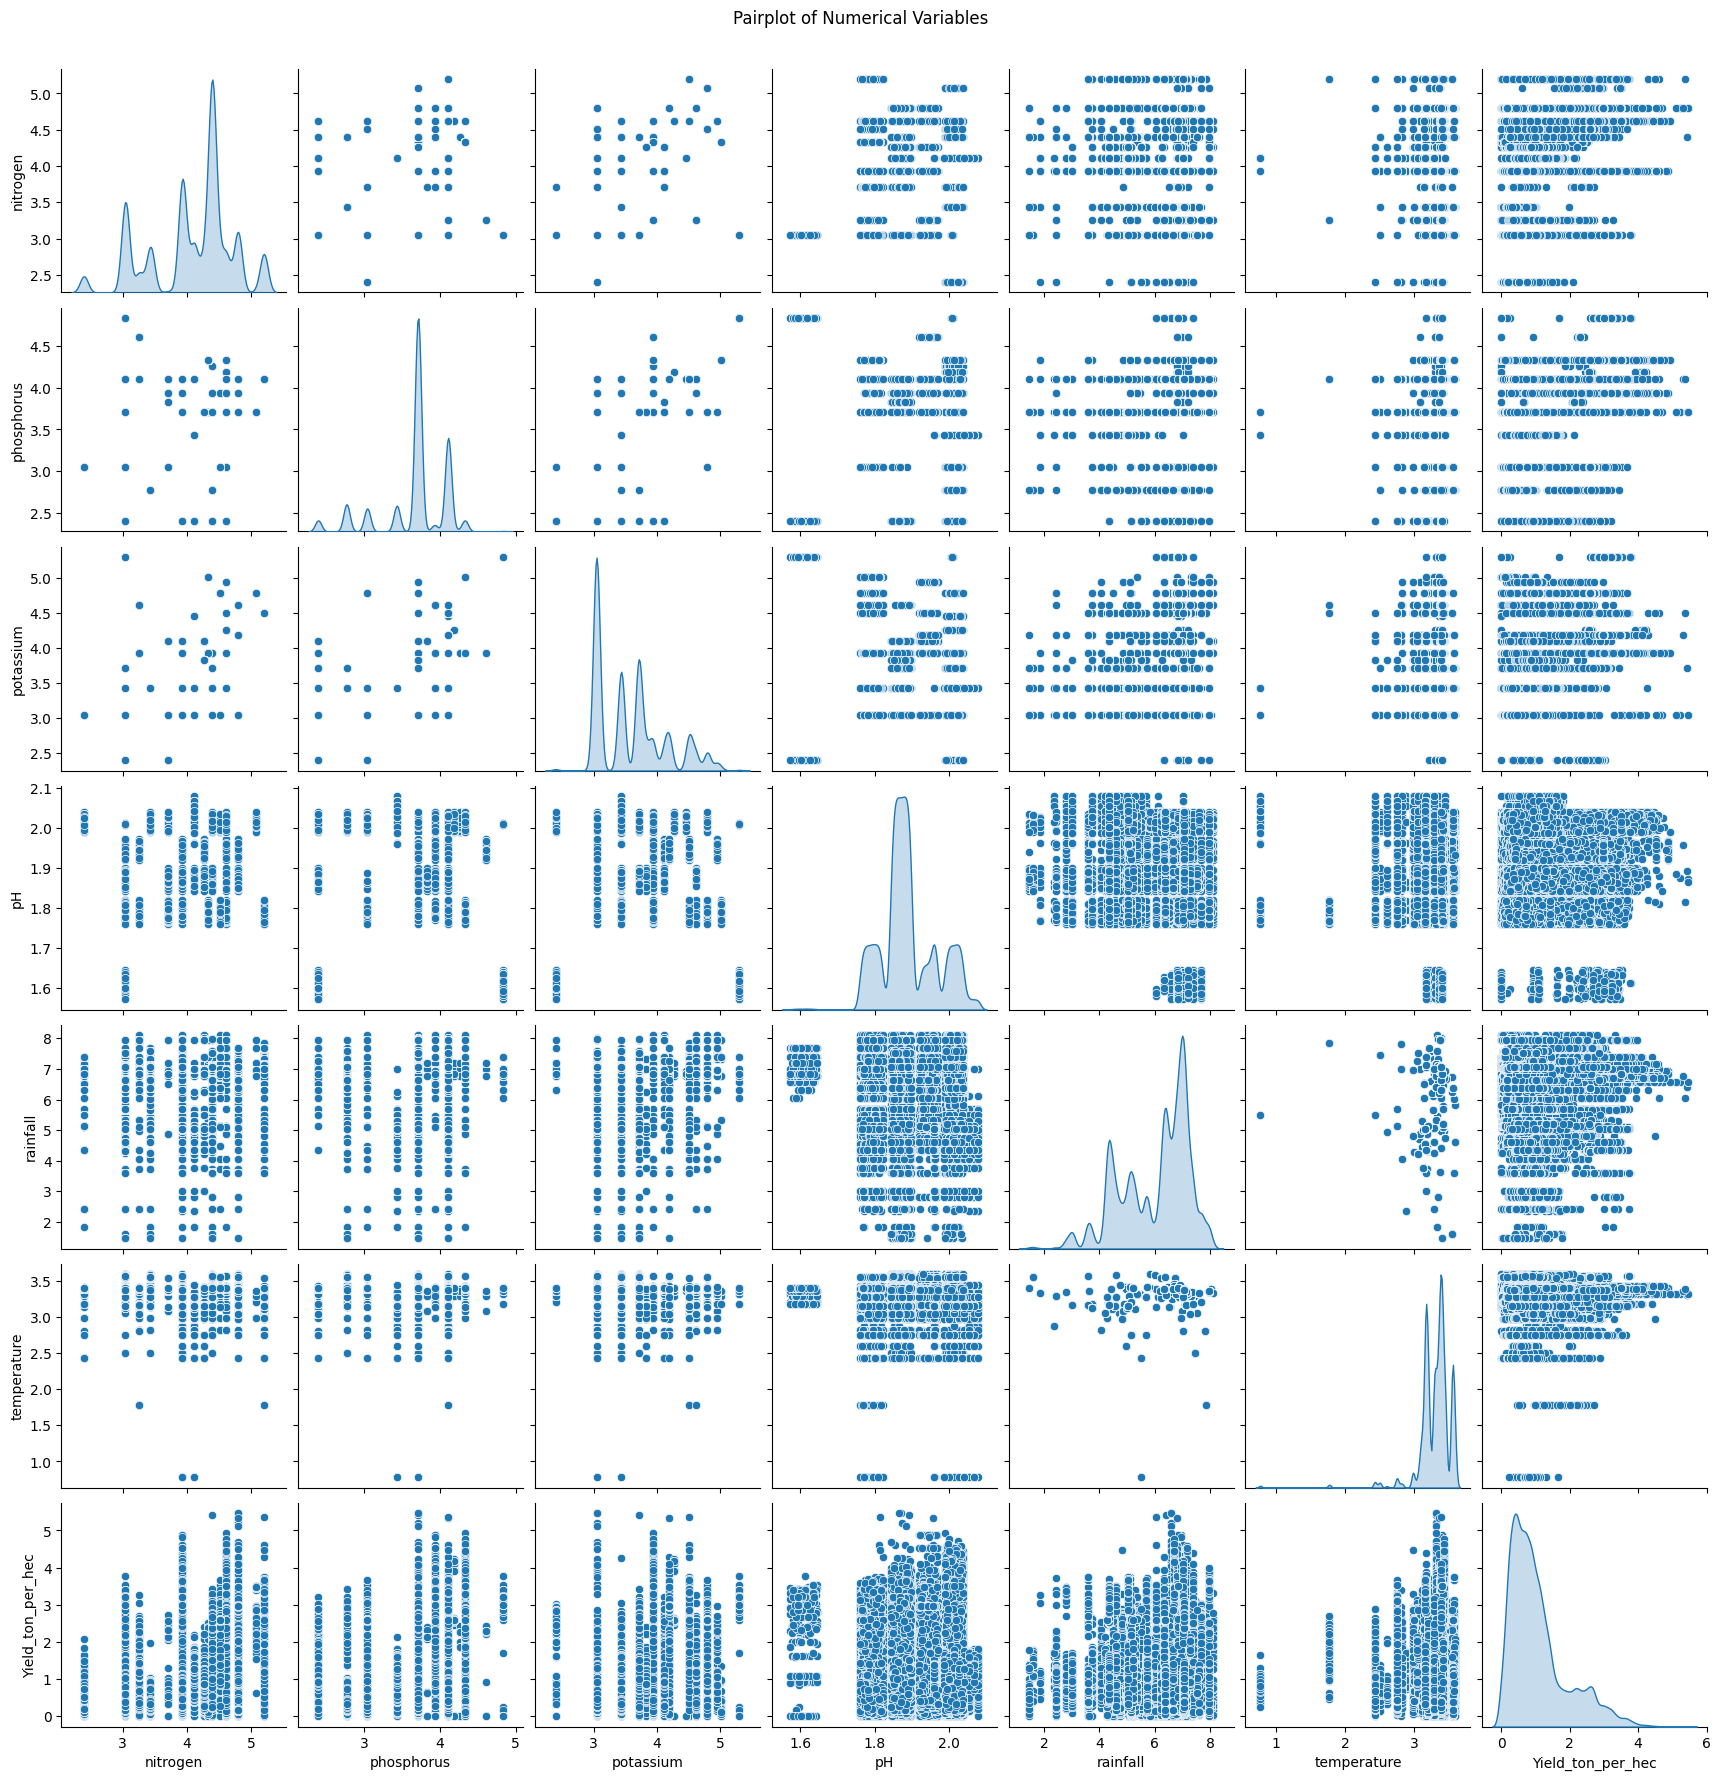

In [ ]:
sns.pairplot(finalLDF[['nitrogen','phosphorus','potassium','pH','rainfall','temperature','Yield_ton_per_hec']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

### Before going with the One Hot encoding on the **Crop** names variable we tried label encoding.
But, unfortunately after the label encoding the data was not easy to visualize, we couldn't depict any valueble informations after the label encoding.

So, we went with One Hot encoding after few trials.
Below we can see how the encoding didn't help in understanding the correlation of the data

In [ ]:
NDF=pd.read_csv('/content/Crop_production.csv')

In [ ]:
NDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          99849 non-null  int64  
 1   State_Name          99849 non-null  object 
 2   Crop_Type           99849 non-null  object 
 3   Crop                99849 non-null  object 
 4   N                   99849 non-null  int64  
 5   P                   99849 non-null  int64  
 6   K                   99849 non-null  int64  
 7   pH                  99849 non-null  float64
 8   rainfall            99849 non-null  float64
 9   temperature         99849 non-null  float64
 10  Area_in_hectares    99849 non-null  float64
 11  Production_in_tons  99849 non-null  float64
 12  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.9+ MB


In [ ]:
DF1=NDF.drop(NDF.columns[[0,1,2,10,11]], axis=1, inplace=False)

In [ ]:
DF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Crop               99849 non-null  object 
 1   N                  99849 non-null  int64  
 2   P                  99849 non-null  int64  
 3   K                  99849 non-null  int64  
 4   pH                 99849 non-null  float64
 5   rainfall           99849 non-null  float64
 6   temperature        99849 non-null  float64
 7   Yield_ton_per_hec  99849 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 6.1+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
crop_encoder = LabelEncoder()
DF1['Crop_Encoded'] = crop_encoder.fit_transform(DF1['Crop'])
DF1=DF1.drop(DF1.columns[[0]], axis=1, inplace=False)

## **Now we check the CORRELATION of the variables of the dataset**

we do that by plotting the correlation matirx

In [ ]:
NDF.head()

,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615


In [ ]:
NDF.keys()

Index(['Unnamed: 0', 'State_Name', 'Crop_Type', 'Crop', 'N', 'P', 'K', 'pH',
       'rainfall', 'temperature', 'Area_in_hectares', 'Production_in_tons',
       'Yield_ton_per_hec'],
      dtype='object')

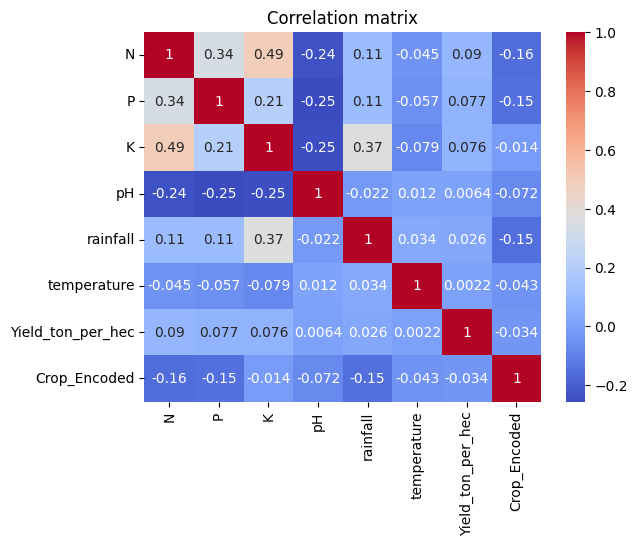

In [ ]:
matrix = DF1.corr()

ax = plt.axes()
sns.heatmap(matrix, cmap="coolwarm", annot=True)

ax.set_title('Correlation matrix')
plt.show()
#plotting correlation matrix



* If the value is -1, it means that there is a perfect negative correlation.



* If the value is 0, it means that there is no correlation between the two variables.

* If the value is 1, it means that there is a perfect positive correlation.

**now let's plot one without the annotations, just for aesthetics**

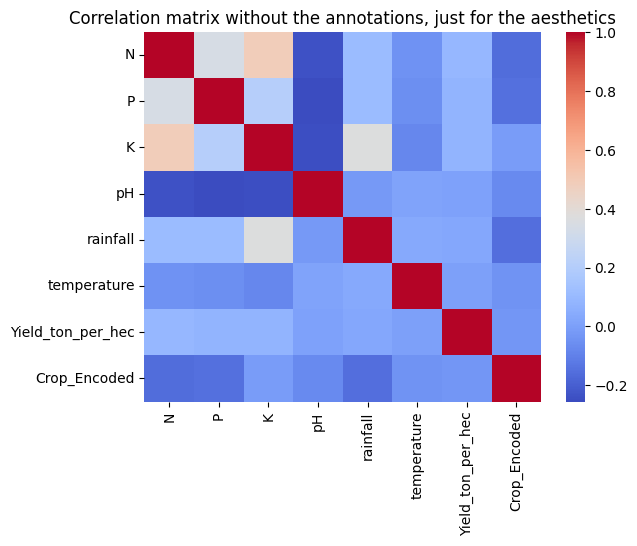

In [ ]:
sns.heatmap(matrix, cmap="coolwarm", annot=False)
plt.title('Correlation matrix without the annotations, just for the aesthetics')

plt.show()

**By the correlation matrix we can find that the Variables are not Correlated well, when the correlation values are near 0, it means that there is not much correlation between the variables.**

### **Now we split the processed dataset into X(train and test) and y(train and test)** 📁 ➡ 📂 , 📂

In [ ]:
yy = finalOHDF.loc[:, ['Yield_ton_per_hec']]

In [ ]:
yy.head()

,Yield_ton_per_hec
0,0.827534
1,0.264693
2,0.698085
3,1.011601
4,0.325422


In [ ]:
XX = finalOHDF.drop(['Yield_ton_per_hec'], axis=1)

In [ ]:
XX.columns

Index(['nitrogen', 'phosphorus', 'potassium', 'pH', 'rainfall', 'temperature',
       'East', 'North', 'South', 'West', 'kharif', 'rabi', 'summer',
       'whole year', 'apple', 'arecanut', 'ashgourd', 'banana', 'barley',
       'beetroot', 'bittergourd', 'blackgram', 'blackpepper', 'bottlegourd',
       'brinjal', 'cabbage', 'cardamom', 'carrot', 'cashewnuts', 'cauliflower',
       'coffee', 'coriander', 'cotton', 'cucumber', 'drumstick', 'garlic',
       'ginger', 'grapes', 'horsegram', 'jackfruit', 'jowar', 'jute',
       'ladyfinger', 'maize', 'mango', 'moong', 'onion', 'orange', 'papaya',
       'pineapple', 'pomegranate', 'potato', 'pumpkin', 'radish', 'ragi',
       'rapeseed', 'rice', 'ridgegourd', 'sesamum', 'soyabean', 'sunflower',
       'sweetpotato', 'tapioca', 'tomato', 'turmeric', 'watermelon', 'wheat'],
      dtype='object')

In [ ]:
XX.shape

(99840, 67)

In [ ]:

#Spliting dataset for training and testing
OXtrain, OXtest, Oytrain, Oytest = train_test_split(XX , yy, test_size=0.2, random_state=42)




---



---



In [ ]:
cdf.head()

,nitrogen,phosphorus,potassium,pH,rainfall,temperature,Yield_ton_per_hec,East,North,South,West,kharif,rabi,summer,whole year,Crop_Encoded
0,120,40,20,5.46,654.34,29.266667,1.287671,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18
1,20,60,20,6.18,654.34,29.266667,0.303030,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,24
2,80,40,40,5.42,654.34,29.266667,1.009901,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,26
3,80,40,20,5.62,654.34,29.266667,1.750000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,29
4,20,40,20,5.68,654.34,29.266667,0.384615,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,31


In [ ]:
cdf.columns

Index(['nitrogen', 'phosphorus', 'potassium', 'pH', 'rainfall', 'temperature',
       'Yield_ton_per_hec', 'East', 'North', 'South', 'West', 'kharif', 'rabi',
       'summer', 'whole year', 'Crop_Encoded'],
      dtype='object')

In [ ]:
finalOHDF.head()

,nitrogen,phosphorus,potassium,pH,rainfall,temperature,Yield_ton_per_hec,East,North,South,...,ridgegourd,sesamum,soyabean,sunflower,sweetpotato,tapioca,tomato,turmeric,watermelon,wheat
0,4.795791,3.713572,3.044522,1.865629,6.485154,3.410047,0.827534,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.044522,4.110874,3.044522,1.971299,6.485154,3.410047,0.264693,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.394449,3.713572,3.713572,1.859418,6.485154,3.410047,0.698085,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.394449,3.713572,3.044522,1.890095,6.485154,3.410047,1.011601,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.044522,3.713572,3.044522,1.899118,6.485154,3.410047,0.325422,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
finalLDF.head()

,nitrogen,phosphorus,potassium,pH,rainfall,temperature,Yield_ton_per_hec,East,North,South,West,kharif,rabi,summer,whole year,Crop_Encoded
0,4.795791,3.713572,3.044522,1.865629,6.485154,3.410047,0.827534,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18
1,3.044522,4.110874,3.044522,1.971299,6.485154,3.410047,0.264693,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,24
2,4.394449,3.713572,3.713572,1.859418,6.485154,3.410047,0.698085,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,26
3,4.394449,3.713572,3.044522,1.890095,6.485154,3.410047,1.011601,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,29
4,3.044522,3.713572,3.044522,1.899118,6.485154,3.410047,0.325422,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,31


In [ ]:
finalLDF.columns

Index(['nitrogen', 'phosphorus', 'potassium', 'pH', 'rainfall', 'temperature',
       'Yield_ton_per_hec', 'East', 'North', 'South', 'West', 'kharif', 'rabi',
       'summer', 'whole year', 'Crop_Encoded'],
      dtype='object')

In [ ]:
yy = finalLDF.loc[:, ['Yield_ton_per_hec']]

In [ ]:
yy.head()

,Yield_ton_per_hec
0,0.827534
1,0.264693
2,0.698085
3,1.011601
4,0.325422


In [ ]:
XX = finalLDF.drop(['Yield_ton_per_hec'], axis=1)

In [ ]:
XX.columns

Index(['nitrogen', 'phosphorus', 'potassium', 'pH', 'rainfall', 'temperature',
       'East', 'North', 'South', 'West', 'kharif', 'rabi', 'summer',
       'whole year', 'Crop_Encoded'],
      dtype='object')

In [ ]:

#Spliting dataset for training and testing
LXtrain, LXtest, Lytrain, Lytest = train_test_split(XX , yy, test_size=0.2, random_state=42)


## **Another Data Dictonary**

SLFXTr: scaled label final x_train

SLFXTe: scaled label final x_test

SLFYTr: scaled label final y_train

SLFYTe: scaled label final y_test

SOFXTr: scaled OH final x_train

SOFXTe: scaled OH final x_test

SOFYTr: scaled OH final y_train

SOFYTe: scaled OH final y_test

OXtrain, OXtest, Oytrain, Oytest :One hot encoded, log transformed

LXtrain, LXtest, Lytrain, Lytest :Label encoded, log transformed

---


we are doing this to keep track of the variable names

#**Feature Scaling** 📏

###Now we will do Feature Scaling on the variables to get their values into a easy to work range

there are many types of Scalling algorithms like:


* MinMax Scaler

* Standard Scaler

* MaxAbsScaler

* Robust Scaler

* Quantile Transformer Scaler

* Power Transformer Scaler

we will go with **Standard Scaler** because it can be used on all types of data.

the reason why we chose to do scaling even after log transformations is because we found this below information in a Reddit post.

    tree-based models are generally less sensitive to feature scaling.
    However, in some cases, scaling can still improve performance.
    It's often recommended to try both approaches (with and without scaling) and see which one performs better on your specific dataset.
    
so we thought it wouldn't hurt to try 😁    

In [ ]:
columns_to_scale = ['nitrogen', 'phosphorus', 'potassium', 'pH', 'rainfall', 'temperature']
OXtrain[columns_to_scale].head()

,nitrogen,phosphorus,potassium,pH,rainfall,temperature
39755,3.258097,4.110874,4.615121,1.791759,7.315205,3.289080
8304,3.931826,3.713572,3.044522,1.887070,5.126223,3.201119
81874,4.110874,3.433987,3.433987,2.066863,4.310396,3.201201
42072,4.795791,3.713572,3.044522,1.890095,5.807782,3.593102
54966,3.433987,2.772589,3.433987,2.014903,6.364320,3.555634


In [ ]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['nitrogen', 'phosphorus', 'potassium', 'pH', 'rainfall', 'temperature']

# Create StandardScaler object
scaler = StandardScaler()

# Fit scaler to selected columns


# Transform selected columns
SOFXTr= OXtrain.copy(deep=True)  # Create a copy of the DataFrame to avoid modifying the original
SOFXTe= OXtest.copy(deep=True)

SLFXTr= LXtrain.copy(deep=True)  # Create a copy of the DataFrame to avoid modifying the original
SLFXTe= LXtest.copy(deep=True)

scaler.fit(SOFXTr[columns_to_scale])
#we wont be fitting the scaler to SLFXTr because the variables we chose to scale are same in both SOFXTr and SLFXTr


SOFXTr[columns_to_scale] = scaler.transform(SOFXTr[columns_to_scale]) #one hot encoded
SOFXTe[columns_to_scale] = scaler.transform(SOFXTe[columns_to_scale])


SLFXTr[columns_to_scale] = scaler.transform(SLFXTr[columns_to_scale]) #label encoded
SLFXTe[columns_to_scale] = scaler.transform(SLFXTe[columns_to_scale])

# Print scaled DataFrame
print("Original DataFrame:")
OXtrain.head()


Original DataFrame:


,nitrogen,phosphorus,potassium,pH,rainfall,temperature,East,North,South,West,...,ridgegourd,sesamum,soyabean,sunflower,sweetpotato,tapioca,tomato,turmeric,watermelon,wheat
39755,3.258097,4.110874,4.615121,1.791759,7.315205,3.289080,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8304,3.931826,3.713572,3.044522,1.887070,5.126223,3.201119,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81874,4.110874,3.433987,3.433987,2.066863,4.310396,3.201201,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
42072,4.795791,3.713572,3.044522,1.890095,5.807782,3.593102,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54966,3.433987,2.772589,3.433987,2.014903,6.364320,3.555634,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print("\nScaled DataFrame:")
SOFXTr.head()


Scaled DataFrame:


,nitrogen,phosphorus,potassium,pH,rainfall,temperature,East,North,South,West,...,ridgegourd,sesamum,soyabean,sunflower,sweetpotato,tapioca,tomato,turmeric,watermelon,wheat
39755,-1.293500,1.024828,1.861134,-1.322389,1.069546,-0.050254,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8304,-0.235737,0.093631,-1.005054,-0.048694,-0.740622,-0.442201,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81874,0.045371,-0.561660,-0.294319,2.354002,-1.415266,-0.441838,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
42072,1.120699,0.093631,-1.005054,-0.008260,-0.177010,1.304446,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54966,-1.017349,-2.111847,-0.294319,1.659629,0.283216,1.137488,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
SOFYTr= Oytrain.copy(deep=True)
yscaler = StandardScaler()
data_to_scale = Oytrain[['Yield_ton_per_hec']].values.reshape(-1, 1)  # Reshape to 2D array
print(type(data_to_scale))
print(data_to_scale)
scaled_data = yscaler.fit_transform(data_to_scale)
SOFYTr['Yield_ton_per_hec'] = scaled_data.squeeze()  # Remove extra dimension


<class 'numpy.ndarray'>
[[0.91629073]
 [0.51082562]
 [0.81286916]
 ...
 [0.14430753]
 [1.01968495]
 [2.36427866]]


In [ ]:
yscaler = StandardScaler()

SOFYTr= Oytrain.copy(deep=True)  # Create a copy of the DataFrame to avoid modifying the original
SOFYTe= Oytest.copy(deep=True)

SLFYTr= Lytrain.copy(deep=True)
SLFYTe= Lytest.copy(deep=True)

data_SOFYTr = SOFYTr[['Yield_ton_per_hec']].values.reshape(-1, 1)
data_SOFYTe = SOFYTe[['Yield_ton_per_hec']].values.reshape(-1, 1)
data_SLFYTr = SLFYTr[['Yield_ton_per_hec']].values.reshape(-1, 1)
data_SLFYTe = SLFYTe[['Yield_ton_per_hec']].values.reshape(-1, 1)

yscaler.fit_transform(data_SOFYTr)
#we won't do a fiting on the SLFYTr seperately because it is the same as SOFYTr

scaledSOFYTr = yscaler.transform(data_SOFYTr)
scaledSOFYTe = yscaler.transform(data_SOFYTe)

scaledSLFYTr = yscaler.transform(data_SLFYTr)
scaledSLFYTe = yscaler.transform(data_SLFYTe)

#.squeeze() removes any extra dimensions from scaled_data,
#ensuring it's a 1D array suitable for assigning to a DataFrame column.
SOFYTr['Yield_ton_per_hec'] = scaledSOFYTr.squeeze()
SOFYTe['Yield_ton_per_hec'] = scaledSOFYTe.squeeze()
SLFYTr['Yield_ton_per_hec'] = scaledSLFYTr.squeeze()
SLFYTe['Yield_ton_per_hec'] = scaledSLFYTe.squeeze()

In [ ]:
print("Original DataFrame:")
print(type(Oytrain))
Oytrain.head()


Original DataFrame:
<class 'pandas.core.frame.DataFrame'>


,Yield_ton_per_hec
39755,0.916291
8304,0.510826
81874,0.812869
42072,0.000000
54966,0.148923


In [ ]:
print("\nScaled DataFrame:")
print(type(SOFYTr))
SOFYTr.head()


Scaled DataFrame:
<class 'pandas.core.frame.DataFrame'>


,Yield_ton_per_hec
39755,-0.187259
8304,-0.672849
81874,-0.311118
42072,-1.284621
54966,-1.106268


## **Now, we can continue the model building process.**
 So we will start with **linear regression** model and then move over to more complex models like **RandomForest** and **XGBoost**.

We will build the following models

*  **Linear Regression**

*  **Decision Tree**

*  **Random Forest**

*  **XGBoost**

In [ ]:
if RUN ALL will stop here.
this cell will raise an error and stop the execution. now only run the models that you want

SyntaxError: invalid syntax (<ipython-input-139-93f205898e1f>, line 1)

### **linear regression**

with scaled, label encoded and log transformed data.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have SLFXTr, SLFXTe, SLFYTr, and SLFYTe

# Initialize linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(SLFXTr, SLFYTr)

# Predict on the testing data
ypred = model.predict(SLFXTe)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(SLFYTe, ypred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared
r_squared = r2_score(SLFYTe, ypred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)


Mean Squared Error (MSE): 0.5137948478085042
Root Mean Squared Error (RMSE): 0.7167948435978765
R-squared: 0.4920550919170531


with scaled, one hot encoded and log transformed data.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have SOFXTr, SOFXTe, SOFYTr, and SOFYTe

# Initialize linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(SOFXTr, SOFYTr)

# Predict on the testing data
ypred = model.predict(SOFXTe)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(SOFYTe, ypred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared
r_squared = r2_score(SOFYTe, ypred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)


with one hot encoded and log transformed


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have OXtrain, OXtest, Oytrain, and Oytest

# Initialize linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(OXtrain, Oytrain)

# Predict on the testing data
ypred = model.predict(OXtest)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Oytest, ypred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared
r_squared = r2_score(Oytest, ypred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)


with label encoded and log transformed

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Initialize linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(LXtrain, Lytrain)

# Predict on the testing data
ypred = model.predict(LXtest)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Lytest, ypred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared
r_squared = r2_score(Lytest, ypred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)


### now **decision trees**
**hyperparameters**

max_depth: Maximum depth of the decision
tree.

min_samples_split: The minimum number of samples required to split an internal node.

min_samples_leaf: the minimum number of samples required to be at a leaf node.

verbose=0: Silent mode - no output during training.

verbose=1: Progress bar mode - displays a progress bar with training and validation metrics (default).

verbose=2: One line per epoch - shows a summary of training and validation metrics after each epoch.

with scaled, label encoded and log transformed data.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [ 20,30,40,60],
    'min_samples_split': [3,10,50,25],
    'min_samples_leaf': [1, 2, 4,8],
}

# Initialize Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the data
grid_search.fit(SLFXTr, SLFYTr)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
ypred = best_model.predict(SLFXTe)

# Calculate metrics
mse = mean_squared_error(SLFYTe, ypred)
rmse = np.sqrt(mse)
r_squared = r2_score(SLFYTe, ypred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)


with scaled, one hot encoded and log transformed data.


In [ ]:

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [ 20,30,40,60],
    'min_samples_split': [3,10,50,25],
    'min_samples_leaf': [1, 2, 4,8],
}

# Initialize Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the data
grid_search.fit(SOFXTr, SOFYTr)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
ypred = best_model.predict(SOFXTe)

# Calculate metrics
mse = mean_squared_error(SOFYTe, ypred)
rmse = np.sqrt(mse)
r_squared = r2_score(SOFYTe, ypred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)


with one hot encoded and log transformed


In [ ]:

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [ 20,30,40,60],
    'min_samples_split': [3,10,50,25],
    'min_samples_leaf': [1, 2, 4,8],
}

# Initialize Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the data
grid_search.fit(OXtrain, Oytrain)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
ypred = best_model.predict(OXtest)

# Calculate metrics
mse = mean_squared_error(Oytest, ypred)
rmse = np.sqrt(mse)
r_squared = r2_score(Oytest, ypred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)


with label encoded and log transformed

In [ ]:
param_grid = {
    'max_depth': [ 20,30,40,60],
    'min_samples_split': [3,10,50,25],
    'min_samples_leaf': [1, 2, 4,8],
}

# Initialize Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the data
grid_search.fit(LXtrain, Lytrain)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
ypred = best_model.predict(LXtest)

# Calculate metrics
mse = mean_squared_error(Lytest, ypred)
rmse = np.sqrt(mse)
r_squared = r2_score(Lytest, ypred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)


### now **random forest**
**hyperparameters**

n_estimators: Number of decision trees in the random forest.

max_depth: Maximum depth of each decision tree.

min_samples_split: Minimum number of samples required to split an internal node.

min_samples_leaf: Minimum number of samples required to be at a leaf node.

In [ ]:
flatSLFYTr=SLFYTr.values.ravel()
flatSOFYTr=SOFYTr.values.ravel()
flatOytrain=Oytrain.values.ravel()
flatLytrain=Lytrain.values.ravel()

with scaled, label encoded and log transformed data.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    "n_estimators": [100, 500],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 3]
}

# Create the random forest regression model
model = RandomForestRegressor(random_state=42)

# Perform grid search hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error',verbose=2)
grid_search.fit(SLFXTr, flatSLFYTr)

# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)

# Make predictions on the test set
ytest_pred = grid_search.best_estimator_.predict(SLFXTe)

# Calculate the MSE, RMSE, and R-squared score
mse = mean_squared_error(SLFYTe, ytest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(SLFYTe, ytest_pred)

print("Mean squared error (MSE):", mse)
print("Root mean squared error (RMSE):", rmse)
print("R-squared score:", r2)


with scaled, one hot encoded and log transformed data.


In [ ]:

# Define the parameter grid
param_grid = {
    "n_estimators": [100, 500],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 3]
}

# Create the random forest regression model
model = RandomForestRegressor(random_state=42)

# Perform grid search hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error',verbose=1)
grid_search.fit(SOFXTr, flatSOFYTr)

# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)

# Make predictions on the test set
ytest_pred = grid_search.best_estimator_.predict(SOFXTe)

# Calculate the MSE, RMSE, and R-squared score
mse = mean_squared_error(SOFYTe, ytest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(SOFYTe, ytest_pred)

print("Mean squared error (MSE):", mse)
print("Root mean squared error (RMSE):", rmse)
print("R-squared score:", r2)


with one hot encoded and log transformed


In [ ]:

param_grid = {
    "n_estimators": [100, 500],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 3]
}

# Create the random forest regression model
model = RandomForestRegressor(random_state=42)

# Perform grid search hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error',verbose=1)
grid_search.fit(OXtrain, flatOytrain)

# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)

# Make predictions on the test set
ytest_pred = grid_search.best_estimator_.predict(OXtest)

# Calculate the MSE, RMSE, and R-squared score
mse = mean_squared_error(Oytest, ytest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Oytest, ytest_pred)

print("Mean squared error (MSE):", mse)
print("Root mean squared error (RMSE):", rmse)
print("R-squared score:", r2)


with label encoded and log transformed

In [ ]:

# Define the parameter grid
param_grid = {
    "n_estimators": [100, 500],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 3]
}

# Create the random forest regression model
model = RandomForestRegressor(random_state=42)

# Perform grid search hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error',verbose=1)
grid_search.fit(LXtrain, flatLytrain)

# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
# Make predictions on the test set
ytest_pred = grid_search.best_estimator_.predict(LXtest)

# Calculate the MSE, RMSE, and R-squared score
mse = mean_squared_error(Lytest, ytest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Lytest, ytest_pred)

print("Mean squared error (MSE):", mse)
print("Root mean squared error (RMSE):", rmse)
print("R-squared score:", r2)


### now **xgboost**

hyperparameters:

learning_rate: Controls the step size for each iteration.

max_depth: Maximum depth of each tree.

min_child_weight: Minimum sum of instance weight in a child.

gamma: Minimum loss reduction to make a split.

subsample: Fraction of samples used for each tree.

colsample_bytree: Fraction of features used for each tree.

n_estimators: Number of trees in the model.



---



but for the sake of simplicity we will go with

learning rate, max depth, min child weight and n estimators

In [ ]:
import xgboost as xgb

with scaled, label encoded and log transformed data.


In [ ]:
# Define the hyperparameters to tune
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [100, 200, 300],
}

# Initialize XGBoost Regressor
model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to the data
grid_search.fit(SLFXTr, SLFYTr)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
ypred = best_model.predict(SLFXTe)

# Calculate metrics
mse = mean_squared_error(SLFYTe, ypred)
rmse = np.sqrt(mse)
r_squared = r2_score(SLFYTe, ypred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)


with scaled, one hot encoded and log transformed data.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [100, 200, 300],
}

# Initialize XGBoost Regressor
model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to the data
grid_search.fit(SOFXTr, SOFYTr)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
ypred = best_model.predict(SOFXTe)

# Calculate metrics
mse = mean_squared_error(SOFYTe, ypred)
rmse = np.sqrt(mse)
r_squared = r2_score(SOFYTe, ypred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)


with one hot encoded and log transformed


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [100, 200, 300],
}

# Initialize XGBoost Regressor
model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to the data
grid_search.fit(OXtrain, Oytrain)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

#encoder.pkl
import pickle

with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

# Use the best model for prediction
best_model = grid_search.best_estimator_
ypred = best_model.predict(OXtest)

# Calculate metrics
mse = mean_squared_error(Oytest, ypred)
rmse = np.sqrt(mse)
r_squared = r2_score(Oytest, ypred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)

import joblib

joblib.dump(model, 'model.pkl')

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 300}
Mean Squared Error (MSE): 0.06690306966529291
Root Mean Squared Error (RMSE): 0.25865627706532257
R-squared: 0.9051348817101599


['model.pkl']

with label encoded and log transformed

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [100, 200, 300],
}

# Initialize XGBoost Regressor
model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to the data
grid_search.fit(LXtrain, Lytrain)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
ypred = best_model.predict(LXtest)

# Calculate metrics
mse = mean_squared_error(Lytest, ypred)
rmse = np.sqrt(mse)
r_squared = r2_score(Lytest, ypred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)
